## This is HNA or Hybrid SFLA-CSO Network Aligner program, and implemented by Elham Mahdipour that is Ph.D. Candidate of Artificial Intelligence at Yazd University, Yazd, Iran. 
### All copyright reserved by the author.

You can run the program from first to end and see all the results, but since the population generation process can take a time depended on the node numbers of networks, you can use the populations stored in each program. We saved the populations as the pair of related species that you can see in the input folder and load them on program, such as "ce-sc-pop.pickle". Therefore, you must run follow steps: 1) Run all cells in "Load Graphs", "Swap Graphs", "Define Target Graph",and "Compute Score for create similarity matrix" sections. 2) If you will use saved population, please upload related pickle on root of jupyter notebook, then go "load population" cell and run them; else, please run "multi tasking for initial population", "multi processing for speed up", and "Initialization such as MeAlign" cells. 3) Run all remains cells to create results.

# Load Graphs 

In [1]:
import pickle
with open('ce-ce-weighted.pickle', 'rb') as f:
    celist = pickle.load(f)

In [2]:
with open('hs-hs-weighted.pickle', 'rb') as f:
    hslist = pickle.load(f)

In [3]:
import networkx as nx
G1=nx.Graph()
for i in range(len(celist)):
    if G1.has_node(celist[i][0])==False:
        G1.add_node(celist[i][0])
    if G1.has_node(celist[i][1])==False:
        G1.add_node(celist[i][1])
    G1.add_edge(celist[i][0],celist[i][1],weight=celist[i][2])
G1

In [4]:
G1.number_of_nodes()

2990

In [5]:
G1.number_of_edges()

10078

In [6]:
len(G1)

2990

In [7]:
G2=nx.Graph()
for i in range(len(hslist)):
    if G2.has_node(hslist[i][0])==False:
        G2.add_node(hslist[i][0])
    if G2.has_node(hslist[i][1])==False:
        G2.add_node(hslist[i][1])
    G2.add_edge(hslist[i][0],hslist[i][1],weight=hslist[i][2])
G2

In [8]:
print('len G1:', len(G1))

print('len G2:',len(G2))

len G1: 2990
len G2: 10399


# Swap graphs if len G1 > len G2

In [9]:
### Check and Swap if G1 > G2 ###
if len(G1)>len(G2):
    temp=G1
    G1=G2
    G2=temp
print(len(G1))
print(len(G2))

2990
10399


In [10]:
ed1=G1.edges()

In [11]:
nd1=G1.nodes()

In [12]:
ed2=G2.edges()

In [13]:
len(ed2)

142847

In [14]:
nd2=G2.nodes()

In [15]:
len(ed1)

10078

In [16]:
len(nd1)

2990

In [17]:
el1=list(ed1)
el2=list(ed2)

In [18]:
nd1=list(nd1)
nd2=list(nd2)

In [19]:
degG1 = [val for (node, val) in G1.degree()]


In [20]:
degG2 = [val for (node, val) in G2.degree()]

# Define Target Graph

In [21]:
G_target_na=nx.read_weighted_edgelist('ce-hs.evals')
G_target_na  

In [22]:
gtnode=list(G_target_na.nodes())
print(len(gtnode))
g_t_node=[]
for i in range(len(gtnode)):
    if (G1.has_node(gtnode[i])==False and G2.has_node(gtnode[i])==False):
        continue
    else:
        g_t_node.append(gtnode[i])

#print(gtnode)
print(len(g_t_node))

24785
10389


In [24]:
G_target=nx.Graph()
for i in range(len(g_t_node)):
    for j in range(len(g_t_node)):
        if G_target_na.has_node(g_t_node[i])==False:
            G_target.add_node(g_t_node[i])
        if G_target_na.has_node(g_t_node[j])==False:
            G_target.add_node(g_t_node[j])
        if G_target_na.has_edge(g_t_node[i],g_t_node[j]):
            a=list(G_target_na.get_edge_data(g_t_node[i],g_t_node[j]).values())
            #b=list(a[0][0].values())
            G_target.add_edge(g_t_node[i],g_t_node[j],weight=a[0])
G_target

In [25]:
len(G_target)

7683

In [26]:
G_target_na=G_target

In [27]:
G_target_na.edges()

EdgeView([('ce1135', 'hs2868'), ('ce1135', 'hs2023'), ('ce1135', 'hs9757'), ('ce1135', 'hs4120'), ('ce1135', 'hs5660'), ('ce1135', 'hs5165'), ('ce1135', 'hs3326'), ('ce1135', 'hs2211'), ('ce1135', 'hs8291'), ('ce1135', 'hs3652'), ('ce1135', 'hs10299'), ('ce1135', 'hs878'), ('ce1135', 'hs3516'), ('ce1135', 'hs1387'), ('ce1135', 'hs10209'), ('ce1135', 'hs4207'), ('ce1135', 'hs4268'), ('ce1135', 'hs5529'), ('ce1135', 'hs10340'), ('ce1135', 'hs900'), ('ce1135', 'hs8300'), ('hs2868', 'ce4290'), ('hs2868', 'ce2119'), ('hs2868', 'ce7433'), ('hs2868', 'ce2420'), ('hs2868', 'ce2914'), ('hs2868', 'ce6673'), ('hs2868', 'ce1177'), ('hs2023', 'ce4290'), ('hs2023', 'ce2119'), ('hs2023', 'ce7433'), ('hs2023', 'ce2420'), ('hs2023', 'ce2914'), ('hs2023', 'ce6673'), ('hs2023', 'ce1177'), ('hs2023', 'ce964'), ('hs2023', 'ce4596'), ('hs9757', 'ce4290'), ('hs9757', 'ce2119'), ('hs9757', 'ce7433'), ('hs9757', 'ce2420'), ('hs9757', 'ce2914'), ('hs9757', 'ce6673'), ('hs9757', 'ce1177'), ('hs9757', 'ce4596'), 

# Compute Score for create similarity matrix
برای ساخت هسته اولیه جهت تولید جمعیت بایدامتیاز اولیه و ماتریس شباهت را بسازیم. این امتیازات را بر اساس پیج رنک، میزان تفاوت درجات رئوس در دو گراف، ضریب یال ورودی، تفاوت بین ضرایب یال های دو گراف و خوشه بندی آنها و شباهت توالی (امتیاز بلست) می سازیم که برگرفته از مقاله می-الاین است 

In [28]:
def deg_Diff(G1,G2):
    Degree_Difference=np.zeros((len(G1),len(G2)))
    for i in range(len(G1)):
        for j in range(len(G2)):
            Degree_Difference[i][j]=abs(degG1[i]-degG2[j])/max(degG1[i],degG2[j])
    return Degree_Difference

In [29]:
def score_pageRank(X):
    a=nx.pagerank(X)
    return a

In [30]:
def coefficient_pagerank(x,y):  #x is G1, y is G2
   # print(len(x))
    p1=score_pageRank(x)
    b=p1.values()
    pr1=list(b)
    p2=score_pageRank(y)
    c=p2.values()
    pr2=list(c)
    pr=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            #print(pr1[i],pr2[j])
            pr[i][j]=abs(pr1[i]-pr2[j])/max(pr1[i],pr2[j])   #minimum pr is maximum similarity of topology 
    return pr

In [31]:
def coefficient_edges(index_node, G, GraphNumber):
    if GraphNumber==1:
        sum_edge=0        
        for i in G.neighbors(nd1[index_node]):                       
            sum_edge=sum_edge+degG1[nd1.index(i)]
        #print(sum_edge)
        temp=(degG1[index_node]-1) if degG1[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG1[index_node]*temp)
    else:
        sum_edge=0        
        for i in G.neighbors(nd2[index_node]):                       
            sum_edge=sum_edge+degG2[nd2.index(i)]
        #print(sum_edge)
        temp=(degG2[index_node]-1) if degG2[index_node]> 1 else 1        
        coeff_node=(2*sum_edge)/(degG2[index_node]*temp)
    return coeff_node
    

In [32]:
def compute_Ea(G1,G2):
    Ea_G1=np.zeros(len(G1))
    Ea_G2=np.zeros(len(G2))
    for i in range(len(G1)):
        Ea_G1[i]=coefficient_edges(i, G1, 1)
    for j in range(len(G2)):
        Ea_G2[j]=coefficient_edges(j,G2,2)
    ea=[Ea_G1, Ea_G2]
    return(ea)

In [33]:
# compute relative clustering coefficient difference between node a (in G1) and node b (in G2)
def CD(G1, G2):
    cd=np.zeros((len(G1),len(G2)))
    EA=compute_Ea(G1,G2)
    #print(EA[0])      #Ea for G1
    #print("===================")
    #print(EA[1])      #Ea for G2
    for i in range(len(G1)):
        for j in range(len(G2)):
            cd[i,j]=abs(EA[0][i]-EA[1][j])/max(EA[0][i],EA[1][j])
    return cd

In [34]:
def sequence_score(x,y):
    seq=np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            q1=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
            if q1==None:
                c=0
            else:
                c=list(q1.values())
                c=c[0]
            seq[i][j]=c    
            
    return seq

In [35]:
def compute_score(G1,G2):
    coeff_pr=coefficient_pagerank(G1,G2)
    dd=deg_Diff(G1,G2)
    cd=CD(G1,G2)
    seq_sc=sequence_score(G1,G2)
    
    alpha=0.1
    betta=0.2
    gamma=0.2
    zetta=1-alpha-betta-gamma
    s=alpha*(1-coeff_pr)+betta*(1-dd)+gamma*(1-cd)+zetta*seq_sc
    return s

In [36]:
import numpy as np
m=compute_score(G1,G2)
n=m


# multi tasking for initial population

In [37]:
def task1(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task1')
    for z1 in range(int(len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
  

In [38]:
def task2(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task2')
    for z1 in range(int(len_G1/3),int(2*len_G1/3)):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

In [39]:
def task3(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation):
    print('task3')
    for z1 in range(int(2*len_G1/3),len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])
    

# multi processing for speed up

In [40]:
def fun_rand_permute(len_G1, base_permute, rand_permutation):
    for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1)
    #print(rand_permutation)

# Initialization such as MeAlign

In [41]:
#%%prun
import random
import threading

len_pop=300 
len_G1=len(G1)
len_G2=len(G2)
similarity_score_matrix=np.zeros((len_G1,len_G1))
sim_score_matrix=np.zeros((len_G1,len_G1))
pop=np.zeros((len_pop,len_G1,2))
index_score=np.zeros(len_G1)
rand_permutation=np.zeros((len_G1,len_G1))
base_permute = [j for  j in range(0, len_G2)]

for i in range(len_pop):  
    print('wait')
    if i>0:
        do_not_permute = set(base_permute)-set(index_score)#[item for item in base_permute if item not in index_score]
        #print(do_not_permute)
        #print(len(base_permute))
        base_permute.extend(do_not_permute)
        #print(len(do_not_permute))
        #print(len(base_permute))
        #print(base_permute)
     
    t = threading.Thread(target=fun_rand_permute, args=(len_G1,base_permute, rand_permutation,))
    t.start() 
    t.join()
    #print(rand_permutation)
    
    """for k in range(len_G1):
        rand_permutation[k]=random.sample(base_permute,len_G1) """               
    print('in for loop')
    """for z1 in range(len_G1):
        for z2 in range(len_G1):
            similarity_score_matrix[z1][z2]=m[z1][int(rand_permutation[z1][z2])]
        index_score=np.argmax(similarity_score_matrix,axis=1)               
        pop[i][z1][0]=nd1.index(nd1[z1])
        pop[i][z1][1]=nd2.index(nd2[int(rand_permutation[z1][index_score[z1]])])"""
     
    
      
    t1 = threading.Thread(target=task1, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,)) 
    t2 = threading.Thread(target=task2, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    t3 = threading.Thread(target=task3, args=(len_G1, similarity_score_matrix,m,index_score,pop,rand_permutation,))
    # starting thread 1 
    t1.start() 
    # starting thread 2 
    t2.start() 
    # starting thread 3 
    t3.start() 
    # wait until thread 1 is completely executed 
    t1.join() 
    # wait until thread 2 is completely executed 
    t2.join() 
    # wait until thread 3 is completely executed 
    t3.join()
    # both threads completely executed 
    print("Done!, i=",i) 
    
pop

wait
in for loop
task1
task2
task3
Done!, i= 0
wait
in for loop
task1
task2
task3
Done!, i= 1
wait
in for loop
task1
task2
task3
Done!, i= 2
wait
in for loop
task1
task2
task3
Done!, i= 3
wait
in for loop
task1
task2
task3
Done!, i= 4
wait
in for loop
task1
task2
task3
Done!, i= 5
wait
in for loop
task1
task2
task3
Done!, i= 6
wait
in for loop
task1
task2
task3
Done!, i= 7
wait
in for loop
task1
task2
task3
Done!, i= 8
wait
in for loop
task1
task2
task3
Done!, i= 9
wait
in for loop
task1
task2
task3
Done!, i= 10
wait
in for loop
task1
task2
task3
Done!, i= 11
wait
in for loop
task1
task2
task3
Done!, i= 12
wait
in for loop
task1
task2
task3
Done!, i= 13
wait
in for loop
task1
task2
task3
Done!, i= 14
wait
in for loop
task1
task2
task3
Done!, i= 15
wait
in for loop
task1
task2
task3
Done!, i= 16
wait
in for loop
task1
task2
task3
Done!, i= 17
wait
in for loop
task1
task2
task3
Done!, i= 18
wait
in for loop
task1
task2
task3
Done!, i= 19
wait
in for loop
task1
task2
task3
Done!, i= 20
wa

Done!, i= 169
wait
in for loop
task1
task2
task3
Done!, i= 170
wait
in for loop
task1
task2
task3
Done!, i= 171
wait
in for loop
task1
task2
task3
Done!, i= 172
wait
in for loop
task1
task2
task3
Done!, i= 173
wait
in for loop
task1
task2
task3
Done!, i= 174
wait
in for loop
task1
task2
task3
Done!, i= 175
wait
in for loop
task1
task2
task3
Done!, i= 176
wait
in for loop
task1
task2
task3
Done!, i= 177
wait
in for loop
task1
task2
task3
Done!, i= 178
wait
in for loop
task1
task2
task3
Done!, i= 179
wait
in for loop
task1
task2
task3
Done!, i= 180
wait
in for loop
task1
task2
task3
Done!, i= 181
wait
in for loop
task1
task2
task3
Done!, i= 182
wait
in for loop
task1
task2
task3
Done!, i= 183
wait
in for loop
task1
task2
task3
Done!, i= 184
wait
in for loop
task1
task2
task3
Done!, i= 185
wait
in for loop
task1
task2
task3
Done!, i= 186
wait
in for loop
task1
task2
task3
Done!, i= 187
wait
in for loop
task1
task2
task3
Done!, i= 188
wait
in for loop
task1
task2
task3
Done!, i= 189
wait
i

array([[[0.0000e+00, 3.3220e+03],
        [1.0000e+00, 2.8400e+03],
        [2.0000e+00, 3.3020e+03],
        ...,
        [2.9870e+03, 9.9780e+03],
        [2.9880e+03, 1.0218e+04],
        [2.9890e+03, 7.8710e+03]],

       [[0.0000e+00, 2.8400e+03],
        [1.0000e+00, 3.3320e+03],
        [2.0000e+00, 3.3370e+03],
        ...,
        [2.9870e+03, 9.1380e+03],
        [2.9880e+03, 4.4940e+03],
        [2.9890e+03, 9.2500e+03]],

       [[0.0000e+00, 3.3310e+03],
        [1.0000e+00, 3.3080e+03],
        [2.0000e+00, 3.3280e+03],
        ...,
        [2.9870e+03, 8.6760e+03],
        [2.9880e+03, 1.0237e+04],
        [2.9890e+03, 8.4650e+03]],

       ...,

       [[0.0000e+00, 3.3200e+03],
        [1.0000e+00, 3.3280e+03],
        [2.0000e+00, 3.3200e+03],
        ...,
        [2.9870e+03, 8.1540e+03],
        [2.9880e+03, 1.0032e+04],
        [2.9890e+03, 8.6760e+03]],

       [[0.0000e+00, 3.3280e+03],
        [1.0000e+00, 2.8400e+03],
        [2.0000e+00, 2.8400e+03],
        .

# Save population

In [33]:
import pickle
with open('mm-sc-base_permute.pickle', 'wb') as f:
    pickle.dump(base_permute, f)

In [34]:
import pickle
with open('mm-sc-pop.pickle', 'wb') as f:
    pickle.dump(pop, f)

## You can load population if there is save population such as 'ce-hs-pop.pickle'

# Load population

In [ ]:
with open('mm-sc-base_permute', 'rb') as f:
    base_permute = pickle.load(f)

In [ ]:
with open('mm-sc-pop.pickle', 'rb') as f:
    pop = pickle.load(f)

# compute measure edge correctness, ics, nc and s3

In [42]:
def induced_function_for_initialpop(sub_pop):
    num_induced=0
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    for i in range(len(sub_g2)):
        for j in range(i,len(sub_g2)):
            if G2.has_edge(nd2[int(sub_g2[i])], nd2[int(sub_g2[j])]):
                num_induced=num_induced+1
    return num_induced

In [43]:
score_ec=np.zeros(len_pop)
score_ics=np.zeros(len_pop)
score_s3=np.zeros(len_pop)
score_nc=np.zeros(len_pop)
num_seq=np.zeros(len_pop)
score_ncorectness=np.zeros(len_pop)

p=pop 
len_G1=len(G1)
map_items=[] #np.zeros((len_pop,len_G1,2))

for i in range(len(p)):
    ec=0
    nc=0
    sub_pop=p[i]
    sub_g2=list(set([sub_pop[i][1] for i in range(len(G1))]))
    num_induced=induced_function_for_initialpop(sub_pop) 
    #print("number induced for i=",i," is: ",num_induced)
    
    for j in range(len_G1):                           
         if G_target_na.has_edge(nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]):
            num_seq[i]+=1  # create sequence matrix 
            map_items.append([nd1[int(p[i][j][0])],nd2[int(p[i][j][1])]])
            ec=ec+1            
            nc=nc+2
                 
    score_ec[i]=ec/G1.number_of_edges()*100
    score_ics[i]=ec/num_induced*100
    score_s3[i]=ec/(G1.number_of_edges()+num_induced-ec)*100
    score_nc[i]=nc/G1.number_of_nodes()*100 
    score_ncorectness[i]=(nc/G_target_na.number_of_nodes())*100
    """if (score_nc[i] > 100):
        score_nc[i]=100
    if (score_ec[i] > 100):
        score_ec[i]=100
    if (score_ics[i] > 100):
        score_ics[i]=100
    if (score_s3[i] > 100):
        score_s3[i]=100
    if ( score_ncorectness[i]>100):
         score_ncorectness[i]=100"""

print('ec')
print(score_ec)
print('ics')
print(score_ics)
print('s3')
print(score_s3)
print('nc',score_nc)
print('node correctness: ',  score_ncorectness)

ec
[14.22901369 13.82218694 14.02063902 13.78249653 13.7031157  14.2389363
 13.66342528 13.74280611 13.95118079 13.9809486  13.89164517 13.67334789
 13.94125819 13.73288351 13.67334789 13.80234173 13.82218694 13.78249653
 13.42528279 13.89164517 13.971026   13.91149038 13.91149038 13.73288351
 13.85195475 13.66342528 13.63365747 13.73288351 13.84203215 13.66342528
 13.81226434 13.65350268 13.73288351 13.73288351 13.94125819 13.76265132
 13.60388966 13.88172256 13.68327049 13.81226434 13.94125819 13.51458623
 13.68327049 13.971026   13.89164517 13.85195475 13.81226434 13.61381226
 13.86187736 13.96110339 13.81226434 13.74280611 13.76265132 13.57412185
 13.82218694 13.73288351 13.7130383  13.78249653 13.86187736 13.95118079
 13.65350268 13.53443143 13.62373487 13.69319309 13.74280611 13.62373487
 13.7229609  13.68327049 14.01071641 13.73288351 13.9809486  13.63365747
 13.82218694 13.94125819 13.76265132 13.69319309 13.83210955 13.89164517
 13.75272872 13.7031157  13.75272872 13.80234173 

## number of matched sequences 

In [44]:
num_seq

array([1434., 1393., 1413., 1389., 1381., 1435., 1377., 1385., 1406.,
       1409., 1400., 1378., 1405., 1384., 1378., 1391., 1393., 1389.,
       1353., 1400., 1408., 1402., 1402., 1384., 1396., 1377., 1374.,
       1384., 1395., 1377., 1392., 1376., 1384., 1384., 1405., 1387.,
       1371., 1399., 1379., 1392., 1405., 1362., 1379., 1408., 1400.,
       1396., 1392., 1372., 1397., 1407., 1392., 1385., 1387., 1368.,
       1393., 1384., 1382., 1389., 1397., 1406., 1376., 1364., 1373.,
       1380., 1385., 1373., 1383., 1379., 1412., 1384., 1409., 1374.,
       1393., 1405., 1387., 1380., 1394., 1400., 1386., 1381., 1386.,
       1391., 1428., 1410., 1390., 1352., 1399., 1378., 1387., 1381.,
       1386., 1383., 1410., 1379., 1353., 1380., 1388., 1374., 1391.,
       1395., 1368., 1373., 1382., 1407., 1382., 1388., 1404., 1423.,
       1356., 1374., 1368., 1408., 1404., 1381., 1392., 1371., 1381.,
       1361., 1394., 1369., 1402., 1399., 1404., 1419., 1382., 1372.,
       1373., 1407.,

## compute topology score

In [45]:
#compute Final Score
tscore=np.zeros(len_pop)
for i in range(len(p)):
    tscore[i]=(0.25*(score_ec[i]/G1.number_of_edges())+0.25*(score_s3[i]/(G1.number_of_edges()+score_ics[i]-score_ec[i]))+0.25*(score_ics[i]/2*G1.number_of_edges())+0.25*(score_nc[i]/(G1.number_of_nodes()+G2.number_of_nodes())))
print(tscore)

[22751.65852969 22090.02935487 22217.0111844  22721.6325946
 23669.5907135  22767.52440037 23129.01226951 23244.78978605
 23232.01307157 22879.45256421 23991.97619081 24265.24549633
 24299.13397736 22928.64509936 22370.30510291 23750.50717375
 23510.60987963 22918.04747433 22921.48891686 24656.09066694
 23621.36335432 22404.79109209 22493.24606604 22485.09384352
 24582.20806475 23287.36634589 23779.31948133 21782.78588296
 22403.76631844 23688.05020301 22895.57612707 24253.75909357
 22019.37585502 23650.21932026 22864.60313965 24166.99053314
 23049.74535319 23707.16197871 22806.81925964 22507.6649784
 22817.44139995 23108.1436597  22646.27068414 21520.60410726
 21974.21112232 22431.26505179 23757.92127717 23826.53934742
 22944.86214407 24803.64422173 21985.60910882 23078.7555889
 22400.94138484 22846.8536394  23878.51297982 23218.72647865
 23212.99561115 24322.9484987  22319.22550641 22043.6675255
 23791.05360198 21911.49165959 21852.64597211 22730.84693786
 22861.03150017 22433.682545

# Compute Topology and Sequence score

In [46]:
# Final Score
score=np.zeros(len_pop)
alpha=0.5
for i in range (len(p)):
    score[i]=alpha*tscore[i]+(1-alpha)*num_seq[i]   
score

array([12092.82926485, 11741.51467743, 11815.0055922 , 12055.3162973 ,
       12525.29535675, 12101.26220018, 12253.00613476, 12314.89489303,
       12319.00653578, 12144.2262821 , 12695.98809541, 12821.62274817,
       12852.06698868, 12156.32254968, 11874.15255145, 12570.75358688,
       12451.80493982, 12153.52373717, 12137.24445843, 13028.04533347,
       12514.68167716, 11903.39554604, 11947.62303302, 11934.54692176,
       12989.10403237, 12332.18317295, 12576.65974066, 11583.39294148,
       11899.38315922, 12532.5251015 , 12143.78806353, 12814.87954678,
       11701.68792751, 12517.10966013, 12134.80156982, 12776.99526657,
       12210.3726766 , 12553.08098936, 12092.90962982, 11949.8324892 ,
       12111.22069998, 12235.07182985, 12012.63534207, 11464.30205363,
       11687.10556116, 11913.6325259 , 12574.96063859, 12599.26967371,
       12170.93107203, 13105.32211086, 11688.80455441, 12231.87779445,
       11893.97069242, 12107.4268197 , 12635.75648991, 12301.36323933,
      

## Define function for fitness and compute final score

In [47]:
def induced_function_for_pop(wpop):
    counter_induced=0
    subg=list(set([wpop[i][1] for i in range(len_G1)]))
    for i in range(len(subg)):
        for j in range(i,len(subg)):
            if G2.has_edge(nd2[int(subg[i])], nd2[int(subg[j])]):
                counter_induced=counter_induced+1
    #print("con: ",counter_induced)
    return counter_induced

In [48]:
def Fitness(wpop,counter_induced):
    ec_temp=0
    nc_temp=0
    num_seq_temp=0
    score_ncorectness=0
    
  
    for j in range(len_G1):        
        x1=int(wpop[j][0])
        x2=int(wpop[j][1])
        if G_target_na.has_edge(nd1[x1],nd2[x2]):
            num_seq_temp+=1              
            ec_temp=ec_temp+1            
            nc_temp=nc_temp+2
                 
    score_ec_temp=ec_temp/G1.number_of_edges()*100
    score_ics_temp=ec_temp/counter_induced*100
    score_s3_temp=ec_temp/(G1.number_of_edges()+counter_induced-ec_temp)*100
    score_nc_temp=nc_temp/G1.number_of_nodes()*100
    score_ncorectness=(nc_temp/G_target_na.number_of_nodes())*100
    """if (score_nc_temp > 100):
        score_nc_temp=100
    if (score_ec_temp > 100):
        score_ec_temp=100
    if (score_ics_temp > 100):
        score_ics_temp=100
    if (score_s3_temp > 100):
        score_s3_temp=100
    if ( score_ncorectness>100):
         score_ncorectness=100"""
    # local measures
    pre=ec_temp/G_target_na.number_of_edges()*100
    rec=ec_temp/len(wpop)*100
    fsc=2*((pre*rec)/(pre+rec))
    
    if (GbestFlag==True):
        print('ec')
        print(score_ec_temp)
        print('ics')
        print(score_ics_temp)
        print('s3')
        print(score_s3_temp)
        print('nc',score_nc_temp)
        print('num_seq',num_seq_temp)
        print('precision: ',pre)
        print('Recall: ',rec)
        print('F-score: ',fsc)

    alpha=0.5
    tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
    score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
    print('score:',score_temp)
    
    return score_temp,pre,rec,fsc


# HNA: Hybrid SFLA-CSO proposed method

In [49]:
# Implementation of Hybrid SFLA-CSO Algorithm
import random
from operator import itemgetter
from random import shuffle
import concurrent.futures

precision=np.zeros(len_pop)
recall=np.zeros(len_pop)
fscore=np.zeros(len_pop)

dim=len_G1
new_pop=p.tolist()
[new_pop[i].append(score[i]) for i in range(len_pop)]
#[print(new_pop[i][dim]) for i in range(len_pop)]

new_pop=sorted(new_pop, key=itemgetter(dim),reverse=True)
counter_induced=num_induced #0

GBestFrog=new_pop[0]
#print("GBest: ",GBestFrog)

index=0
iteration=2
epoch=0
memeplex=100

group=int(len_pop/memeplex)
len_G1=len(G1)
dim=len_G1
GbestFlag=False
max_score=max(score)
while (epoch<5):
    k=u=0
    #==== Set memeplexes =====
    memp=[]
    memp.append([new_pop[0],new_pop[memeplex],new_pop[2*memeplex]])#,new_pop[3*memeplex],new_pop[4*memeplex]])
    for i in range(1,memeplex):    
        memp.append([new_pop[i],new_pop[i+memeplex],new_pop[i+2*memeplex]])#,new_pop[i+3*memeplex],new_pop[i+4*memeplex]])
    #print('Check memeplex')
    #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
    #=== Local Search =====   
    while(k<memeplex):
        u=0
        print("k ",k)
        print("epoch ",epoch)
        while(u<iteration):
            print("u ",u)
            memp[k]=sorted(memp[k], key=itemgetter(dim),reverse=True)
            #print('Check sort memeplex')
            #[[print(memp[i][j][dim]) for j in range(group)]for i in range(memeplex)]
            #=== set best frog and worst frog 
            bestFrog=memp[k][0]
            worstFrog=memp[k][group-1]            
            #print("BestFrog",bestFrog[dim])
            #print("WorstFrog",worstFrog[dim])
            r1=random.random()
            c1=2
            TeV=(worstFrog[dim]+r1*c1*(bestFrog[dim]-worstFrog[dim]))/100             #number of permutation
           # print(TeV)
                       
            # move 1
            temp_worst=worstFrog    #temp_worst is TeX
            Flag_move1=False
            # counter induced for ics compute            
            """with concurrent.futures.ThreadPoolExecutor() as executor:
                future = executor.submit(induced_function_for_pop, temp_worst)
                counter_induced = future.result()
                #print("counter induced: ",counter_induced)"""
            
            for i in range(int(TeV)):
                #Flag_move1=False
                rand_index1=random.randint(0,dim-1)
                rand_permute=random.sample(base_permute,len_G1)                
                #print('rand1',rand_index1)                                
                if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                                                 
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])                        
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if(G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move1=True
                                    print('move1 ', TeV)                                                                 
            #======== move 2 =======
            Flag_move2=False
            
            if(Flag_move1==False):
                    TeV=(worstFrog[dim]+r1*c1*(GBestFrog[dim]-worstFrog[dim]))/100   #number of random permutation                
                            #print(TeV)                
           
                    temp_worst=worstFrog    #temp_worst is TeX               
                
                    for i in range(int(TeV)):
                        #Flag_move2=False
                        rand_permute=random.sample(base_permute,len_G1)
                        rand_index1=random.randint(0,dim-1)
                        if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                            
                            temp_score=np.argmax(m[rand_index1])
                            #print(nd2[temp_score])
                            #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                            if(G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                
                                temp_worst[rand_index1][1]=temp_score                                                                   
                                Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                                if(Fit_New>worstFrog[dim]):
                                    print('w',worstFrog[dim])
                                    print('new',Fit_New)
                                    temp_worst[dim]=Fit_New
                                    memp[k][group-1]=temp_worst 
                                    Flag_move2=True
                                    print('move2 ', TeV)                                                                      
                    #===== move 3 =====
            
            if(Flag_move1==False and Flag_move2==False):
                TeV=(worstFrog[dim]*random.random()*2)/100             #number of permutation
                                            # print(TeV)
                              
                temp_worst=worstFrog   #temp_worst is TeX                    
                for i in range(int(TeV)):
                    rand_permute=random.sample(base_permute,len_G1)
                    rand_index1=random.randint(0,dim-1) 
                    if not(G_target_na.has_edge(temp_worst[rand_index1][0],temp_worst[rand_index1][1])):                        
                        temp_score=np.argmax(m[rand_index1])
                        #print(nd2[temp_score])
                        #print('temp:',G_target_na.has_edge(nd1[int(temp_worst[rand_index1][0])],nd2[temp_score]))
                        if (G_target_na.has_edge(temp_worst[rand_index1][0],nd2[temp_score])):                                                    
                            temp_worst[rand_index1][1]=temp_score                            
                            Fit_New,pre,rec,fsc=Fitness(temp_worst,counter_induced)     
                            if(Fit_New>worstFrog[dim]):
                                print('w',worstFrog[dim])
                                print('new',Fit_New)
                                temp_worst[dim]=Fit_New
                                memp[k][group-1]=temp_worst  
                                print('move3 ',TeV)
                
            u=u+1
        k=k+1    
    epoch+=1
    #==== combine memeplexes and create new pop ====
    print('*********** fitness **************')    
    new_pop=[]
    for i in range(memeplex):
        for j in range(group):        
            del memp[i][j][dim]
       
    [[new_pop.append(memp[i][j]) for j in range(group)] for i in range(memeplex)]         
    
    for i in range(len_pop):
        Fit,pre,rec,fsc=Fitness(new_pop[i],counter_induced)
        print('Fit pop',Fit)
        new_pop[i].append(Fit)
        score[i]=Fit
        precision[i]=pre
        recall[i]=rec
        fscore[i]=fsc
    
    new_pop=sorted(new_pop, key=itemgetter(dim), reverse=True)
    print('********** new population ************')
    [print('Fitness: ',new_pop[i][dim]) for i in range(len_pop)]
    
    GBestFrog=new_pop[0]
    
#print("GBest: ",GBestFrog)    
print("epoch: ",epoch)
print("score:", score)
#********** print Local Measures *********
print("Precision: ",precision)
print("Recall: ", recall)
print("F-measure: ",fscore)
#******** map items **********
map_items=[]
weight=[]
for i in range(len_pop):
    for j in range(len_G1):
        if G_target_na.has_edge(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]):
            map_items.append([nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])]]) 
            weight.append(G_target_na.get_edge_data(nd1[int(new_pop[i][j][0])],nd2[int(new_pop[i][j][1])])) 

print("end")

k  0
epoch  0
u  0
score: 12304.084248957932
w 12010.873013522472
new 12304.084248957932
move1  136.92963059004254
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  136.92963059004254
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  136.92963059004254
score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  136.92963059004254
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  136.92963059004254
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  136.92963059004254
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  136.92963059004254
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  136.92963059004254
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  136.92963059004254
score: 12375.360624094721
score: 12384.

score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  139.3158386503324
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  139.3158386503324
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  139.3158386503324
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  139.3158386503324
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  139.3158386503324
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  139.3158386503324
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971

score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  136.85132047993827
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  136.85132047993827
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  136.85132047993827
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  136.85132047993827
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  136.85132047993827
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  136.85132047993827
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.73

score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  131.15413874512132
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  131.15413874512132
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  131.15413874512132
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  131.15413874512132
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  131.15413874512132
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  131.15413874512132
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  131.15413874512132
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  131.15413874512132
score

score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  131.19374536157213
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  131.19374536157213
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  131.19374536157213
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  131.19374536157213
k  4
epoch  0
u  0
score: 12526.822921262577
w 11999.084957223304
new 12526.822921262577
move1  125.31053131669108
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  125.31053131669108
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  125.31053131669108
score:

new 12705.01385911091
move1  132.53881564061288
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  132.53881564061288
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  132.53881564061288
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  132.53881564061288
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  132.53881564061288
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  132.53881564061288
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  132.53881564061288
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.47114046621

score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  133.76403272009756
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  133.76403272009756
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  133.76403272009756
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  133.76403272009756
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  133.76403272009756
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  133.76403272009756
score: 12669.37567154

score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  123.98851597323241
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  123.98851597323241
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  123.98851597323241
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  123.98851597323241
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  123.98851597323241
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  123.98851597323241
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
m

score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  126.29953110096669
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  126.29953110096669
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  126.29953110096669
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  126.29953110096669
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  126.29953110096669
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  126.29953110096669
score: 12464.456093016

score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  135.68162125570208
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  135.68162125570208
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  135.68162125570208
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  135.68162125570208
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  135.68162125570208
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  135.68162125570208
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  135.68162125570208
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651


score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  130.22816735593565
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  130.22816735593565
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  130.22816735593565
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  130.22816735593565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  130.22816735593565
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  130.22816735593565
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  130.22816735593565
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  130.22816735593565
sco

score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  127.56448634147317
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  127.56448634147317
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.56448634147317
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.56448634147317
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.56448634147317
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.56448634147317
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.56448634147317
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 125

score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  126.7223072364223
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  126.7223072364223
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  126.7223072364223
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  126.7223072364223
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  126.7223072364223
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  126.722307236

move1  127.37078225059413
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.37078225059413
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.37078225059413
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.37078225059413
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.37078225059413
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.37

score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  132.2760295037594
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  132.2760295037594
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  132.2760295037594
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  132.2760295037594
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  132.2760295037594
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  132.2760295037594
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  132.2760295037594
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  132.2760295037594
score: 12482.275186801136
score: 12482.

score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  124.49145289954667
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  124.49145289954667
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  124.49145289954667
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  124.49145289954667
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  124.49145289954667
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  124.49145289954667
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.2852

score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  129.70226976918903
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  129.70226976918903
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  129.70226976918903
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  129.70226976918903
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  129.70226976918903
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  129.70226976918903
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  129.70226976918903
score: 12571.370655724277
score: 12571.370655724277
score: 12580.2802026166

score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  132.3635803524915
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  132.3635803524915
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  132.3635803524915
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  132.3635803524915
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  132.3635803524915
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  132.3635803524915
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280

score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.06973934179501
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.06973934179501
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.06973934179501
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.06973934179501
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.06973934179501
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.06973934179501
score: 12669.375671540913
score: 12678.285218433397
w 12669.375

score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.03494936006116
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.03494936006116
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.03494936006116
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.03494936006116
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.03494936006116
score: 12749.561593573633
score: 12749.561593573633
score: 12749.5615

score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  131.44333345160715
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  131.44333345160715
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  131.44333345160715
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  131.44333345160715
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  131.44333345160715
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.73246

move1  128.72610758704207
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.72610758704207
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.72610758704207
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.72610758704207
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.72610758704207
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.72610758704207
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.72610758704207
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
mo

score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  125.28685654981466
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  125.28685654981466
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  125.28685654981466
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  125.28685654981466
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  125.28685654981466
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  125.28685654981466
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  125.28685654981466
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  125.28685654981466
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  125.2868

score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  131.9415603438719
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  131.9415603438719
u  1
score: 12393.179717879026
w 12314.067980754078
new 12393.179717879026
move1  124.17759237772148
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  124.17759237772148
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  124.17759237772148
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  124.1

score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
u  1
score: 12482.275186801136
w 12312.12914903032
new 12482.275186801136
move1  131.1786818226509
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  131.1786818226509
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  131.1786818226509
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  131.1786818226509
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  131.1786818226509
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  131.178681

score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  125.60077791919251
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
u  1
score: 12598.099296401417
w 12310.32613094465
new 12598.099296401417
move1  128.27390195759864
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  128.27390195759864
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  128.27390195759864
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  128.27390195759864
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.27390195759864


score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  128.53465167829665
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  128.53465167829665
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  128.53465167829665
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  128.53465167829665
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  128.53465167829665
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  128.53465167829665
score: 12553.55156

score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  126.18104938634293
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  126.18104938634293
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  126.18104938634293
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  126.18104938634293
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  126.18104938634293
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  126.18104938634293
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
m

score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  127.82165951309923
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  127.82165951309923
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  127.82165951309923
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  127.82165951309923
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  127.82165951309923
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  127.82165951309923
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  127.82165951309923
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  127.82165951309923
score: 12437.727452339952
w 12428.817905447748
new 12437.72

score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  131.62090545323562
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  131.62090545323562
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  131.62090545323562
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  131.62090545323562
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  131.62090545323562
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  131.62090545323562
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  131.62090545323562
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.1847336

score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  128.60033731242777
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  128.60033731242777
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  128.60033731242777
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  128.60033731242777
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  128.60033731242777
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  128.60033731242777
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  128.60033731242777
sco

score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  123.65079176552089
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  123.65079176552089
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  123.65079176552089
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  123.65079176552089
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  123.65079176552089
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  123.65079176552089
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.09428

score: 12348.631983418352
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  127.5979142147968
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  127.5979142147968
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  127.5979142147968
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  127.5979142147968
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  127.5979142147968
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  127.5979142147968
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  127.5979142147968
score: 12410.998811663363
score: 12410.998811663363
score: 1241

score: 12179.350592470124
score: 12188.26013936204
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12206.079233145914
score: 12206.079233145914
score: 12214.988780037866
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12232.807873821796
score: 12232.807873821796
score: 12232.807873821796
score: 12241.717420713778
score: 12241.717420713778
score: 12241.717420713778
score: 12250.62696760577
score: 12250.62696760577
score: 12259.536514497771
score: 12259.536514497771
score: 12268.446061389785
w 12263.849801858401
new 12268.446061389785
move1  126.4840150915108
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  126.4840150915108
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12286.265155173836
w 12277.355608281807
new 12286.26

score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  123.80408193630714
k  34
epoch  0
u  0
score: 12446.636999232167
w 11858.11275320309
new 12446.636999232167
move1  131.2357057675033
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  131.2357057675033
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  131.2357057675033
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  131.2357057675033
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  131.2357057675033
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  131.2357057675033
score: 12491.184733693402
score: 12491.184733693402
score: 12

score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  122.29065327962773
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  122.29065327962773
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  122.29065327962773
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  122.29065327962773
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  122.29065327962773
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  122.29065327962773
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  122.290653279627

score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  125.32161445812758
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  125.32161445812758
k  36
epoch  0
u  0
score: 12268.446061389785
w 11855.462314977787
new 12268.446061389785
move1  120.86480052382173
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  120.86480052382173
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12286.265155173836
w 12277.355608281807
new 12286.265155173836
move1  120.86480052382173
score: 12286.265155173836
score: 12286.265155173836
score: 12286.265155173836
score: 12286.265155173836
score: 12286.265155173836
score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  120.86480052382173
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702

score: 12072.436029767872
score: 12081.345576659673
w 12072.436029767872
new 12081.345576659673
move1  130.11732504723207
score: 12081.345576659673
score: 12081.345576659673
score: 12090.255123551482
w 12081.345576659673
new 12090.255123551482
move1  130.11732504723207
score: 12090.255123551482
score: 12099.1646704433
w 12090.255123551482
new 12099.1646704433
move1  130.11732504723207
score: 12099.1646704433
score: 12099.1646704433
score: 12099.1646704433
score: 12099.1646704433
score: 12099.1646704433
score: 12108.074217335126
w 12099.1646704433
new 12108.074217335126
move1  130.11732504723207
score: 12108.074217335126
score: 12116.983764226965
w 12108.074217335126
new 12116.983764226965
move1  130.11732504723207
score: 12125.893311118818
w 12116.983764226965
new 12125.893311118818
move1  130.11732504723207
score: 12125.893311118818
score: 12125.893311118818
score: 12125.893311118818
score: 12125.893311118818
score: 12125.893311118818
score: 12125.893311118818
score: 12125.89331111881

score: 12295.174702065879
score: 12295.174702065879
score: 12295.174702065879
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  129.13342258448824
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  129.13342258448824
score: 12312.993795849996
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  129.13342258448824
score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  129.13342258448824
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  129.13342258448824
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  129.13342258448824
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  129.13342258448824
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.54153031

score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  127.97551017734423
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  127.97551017734423
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  127.97551017734423
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.97551017734423
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.97551017734423
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.97551017734423
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.9755101773442

score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  121.5575459623679
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  121.5575459623679
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  121.5575459623679
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  121.5575459623679
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  121.5575459623679
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  121.5575459623679
score: 12544.642015047226
score: 12553.551561939565


score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  132.9601750739205
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  132.9601750739205
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  132.9601750739205
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  132.9601750739205
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  132.9601750739205
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  132.9601750739205
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  132.9601750739205
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  132.9601750739205
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  132.9601750739205


score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  119.90791346975442
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  119.90791346975442
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  119.90791346975442
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  119.90791346975442
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  119.90791346975442
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  119.90791346975442
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  119.90791346975442
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  119.90791346975442
score: 1

score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12152.621951794421
w 12143.712404902544
new 12152.621951794421
move1  133.53808577017446
score: 12161.53149868631
w 12152.621951794421
new 12161.53149868631
move1  133.53808577017446
score: 12161.53149868631
score: 12170.441045578213
w 12161.53149868631
new 12170.441045578213
move1  133.53808577017446
score: 12179.350592470124
w 12170.441045578213
new 12179.350592470124
move1  133.53808577017446
score: 12179.350592470124
score: 12188.26013936204
w 12179.350592470124
new 12188.26013936204
move1  133.53808577017446
score: 12188.26013936204
score: 12188.26013936204
score: 12188.26013936204
score: 12197.169686253972
w 12188.26013936204
new 12197.169686253972
move1  133.53808577017446
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12206.079233145914
w 12197.169686253972
new 12206.079233145914


score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  130.25066155172345
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  130.25066155172345
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  130.25066155172345
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  130.25066155172345
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 124

score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  120.00034504224753
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  120.00034504224753
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  120.00034504224753
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  120.00034504224753
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  120.00034504224753
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  120.00034504224753
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  120.00034504224753
score: 12509.00382747

score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  121.89382325539309
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  121.89382325539309
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  121.89382325539309
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  121.89382325539309
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  121.89382325539309
u  1
score: 12517.91337437027
w 12213.905607957511
new 12517.91337437027
move1  

score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  133.75565531703148
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  133.75565531703148
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  133.75565531703148
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  133.75565531703148
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  133.75565531703148
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
u  1
score: 12001.159654633853
score: 12001.159654633853
score: 12001.159654633853
score: 12010.06920152557
score: 12018.9787484173
score: 12018.9787484173
score: 12027.888295309036
score

score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.83983581518231
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.83983581518231
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.83983581518231
u  1
score: 12223.898326929824
w 12210.372676595234
new 12223.898326929824
move1  126.40456142304927
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12232.807873821796
w 12223.898326929824
new 12232.807873821796
move1  126.40456142304927
score: 12232.807873821796
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  126.40456142304927
score: 12250.62696760577
w 12241.717420713778
new 12250.62696760577
move1  126.40456142304927
score: 12250.62696760577
score: 12250.62696760577
score: 12250.62696760577
score: 12250.626

score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  131.32456406496706
u  1
score: 12188.26013936204
score: 12188.26013936204
score: 12188.26013936204
score: 12188.26013936204
score: 12188.26013936204
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12206.079233145914
score: 12214.988780037866
w 12209.803695654515
new 12214.988780037866
mo

score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  122.14633956470796
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  122.14633956470796
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  122.14633956470796
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  122.14633956470796
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  122.14633956470796
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  122.14633956470796
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  122.14633956470796
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  122.14633956470796
score: 12437

score: 12188.26013936204
score: 12188.26013936204
score: 12197.169686253972
score: 12197.169686253972
score: 12206.079233145914
w 12205.941303768754
new 12206.079233145914
move1  122.2760583824364
score: 12206.079233145914
score: 12206.079233145914
score: 12206.079233145914
score: 12206.079233145914
score: 12206.079233145914
score: 12206.079233145914
score: 12214.988780037866
w 12206.079233145914
new 12214.988780037866
move1  122.2760583824364
score: 12223.898326929824
w 12214.988780037866
new 12223.898326929824
move1  122.2760583824364
score: 12232.807873821796
w 12223.898326929824
new 12232.807873821796
move1  122.2760583824364
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  122.2760583824364
score: 12250.62696760577
w 12241.717420713778
new 12250.62696760577
move1  122.2760583824364
score: 12250.62696760577
score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  122.2760583824364
score: 12259.536514497771
score: 12259.536514497771
sco

score: 12312.993795849996
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  122.09633086010906
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  122.09633086010906
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  122.09633086010906
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  122.09633086010906
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  122.09633086010906
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  122.09633086010906
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  122.09633086010906
score: 12375.360

score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  126.59098539942161
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  126.59098539942161
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  126.59098539942161
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  126.59098539942161
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  126.59098539942161
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  126.59098539942161
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  126.59098539942161
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  126.59098539942161
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562

score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  127.96849333493276
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.96849333493276
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.96849333493276
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.96849333493276
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.96849333493276
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.96849333493276
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.96849333493276
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.96849333493276
score: 12687.194765325894
w 12678.285218433397
new 126

score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  126.8902715819154
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  126.8902715819154
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  126.8902715819154
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  126.8902715819154
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  126.8902715819154
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  126.8902715819154
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  126.8902715819154
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  126.8902715819154
score: 1261

score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  122.96244143908565
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  122.96244143908565
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  122.96244143908565
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  122.96244143908565
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  122.96244143908565
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  122.96244143908565
score: 12589.189749509025
w 12580.

score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  129.91059982377314
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  129.91059982377314
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  129.91059982377314
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  129.91059982377314
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  129.91059982377314
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  129.91059982377314
score: 12624.827937078651
w 12615.918390186

score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  125.58013006746772
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  125.58013006746772
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  125.58013006746772
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  125.58013006746772
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  125.58013006746772
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  125.58013006746772
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1 

score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  123.65210127083319
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  123.65210127083319
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  123.65210127083319
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  123.65210127083319
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  123.65210127083319
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  123.65210127083319
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  123.65210127083319
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 125

score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  121.56386338797418
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  121.56386338797418
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  121.56386338797418
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  121.56386338797418
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  121.56386338797418
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  121.56386338797418
score: 12544.642015047226
w 12535.7324681548

score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  129.3186923087018
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  129.3186923087018
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  129.3186923087018
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  129.3186923087018
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  129.3186923087018
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  129.3186923087018
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  129.3186923087018
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  129.318

score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  129.07360927646582
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  129.07360927646582
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  129.07360927646582
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  129.07360927646582
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  129.07360927646582
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  129.07360927646582
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990

score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  129.59973511562234
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  129.59973511562234
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  129.59973511562234
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  129.59973511562234
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  129.59973511562234
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  129.59973511562

score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  122.5472520470218
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  122.5472520470218
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  122.5472520470218
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  122.5472520470218
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  122.5472520470218
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  122.5472520470218
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  122.5472520470218
score

score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  126.3824953684679
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.3824953684679
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.3824953684679
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.3824953684679
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.3824953684679
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.3824953684679
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.3824953684679
sco

score: 12214.988780037866
w 12206.079233145914
new 12214.988780037866
move1  123.87978425404017
score: 12214.988780037866
score: 12214.988780037866
score: 12223.898326929824
w 12214.988780037866
new 12223.898326929824
move1  123.87978425404017
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12223.898326929824
score: 12232.807873821796
w 12223.898326929824
new 12232.807873821796
move1  123.87978425404017
score: 12232.807873821796
score: 12232.807873821796
score: 12232.807873821796
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  123.87978425404017
score: 12241.717420713778
score: 12250.62696760577
w 12241.717420713778
new 12250.62696760577
move1  123.87978425404017
score: 12250.62696760577
score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  123.87978425404017
score: 12259.536514497771
score: 12259.536514497771
score: 12259.536514497771
score: 12259.536514497771
score: 12259

score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  128.95688130801005
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.95688130801005
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  128.95688130801005
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  128.95688130801005
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  128.95688130801005
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  128.95688130801005
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  128.95688130801005
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.2852

score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  124.53781525885275
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  124.53781525885275
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  124.53781525885275
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  124.53781525885275
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  124.53781525885275
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  124.53781525885275
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.6470308

score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  124.08440008368034
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  124.08440008368034
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  124.08440008368034
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  124.08440008368034
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  124.08440008368034
score: 12562.461108831918
s

score: 12250.62696760577
score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  125.86565798108477
score: 12259.536514497771
score: 12268.446061389785
w 12259.536514497771
new 12268.446061389785
move1  125.86565798108477
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  125.86565798108477
score: 12286.265155173836
w 12277.355608281807
new 12286.265155173836
move1  125.86565798108477
score: 12286.265155173836
score: 12286.265155173836
score: 12286.265155173836
score: 12286.265155173836
score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  125.86565798108477
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  125.86565798108477
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 123

score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  123.6959149260732
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  123.6959149260732
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  123.6959149260732
score: 12384.27017098687
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  123.6959149260732
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  123.6959149260732
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  123.6959149260732
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 1

score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  127.02781314459435
score: 12304.084248957932
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  127.02781314459435
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  127.02781314459435
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  127.02781314459435
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  127.02781314459435
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  127.02781314459435
score: 12348.631983418352
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  127.02781314459435
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  127.02781314459435
score: 12366.451077202588
score: 12366.45107720258

score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  125.15545991883606
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  125.15545991883606
score: 12428.817905447748
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  125.15545991883606
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  125.15545991883606
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  125.15545991883606
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  125.15545991883606
score: 12464.

score: 12580.280202616646
u  1
score: 12161.53149868631
w 12118.779057635962
new 12161.53149868631
move1  127.28154855837109
score: 12161.53149868631
score: 12170.441045578213
w 12161.53149868631
new 12170.441045578213
move1  127.28154855837109
score: 12179.350592470124
w 12170.441045578213
new 12179.350592470124
move1  127.28154855837109
score: 12179.350592470124
score: 12179.350592470124
score: 12188.26013936204
w 12179.350592470124
new 12188.26013936204
move1  127.28154855837109
score: 12188.26013936204
score: 12188.26013936204
score: 12188.26013936204
score: 12197.169686253972
w 12188.26013936204
new 12197.169686253972
move1  127.28154855837109
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12197.169686253972
score: 12206.079233145914
w 12197.169686253972
new 12206.079233145914
move1  127.28154855837109
score: 12206.079233145914
score: 12206.079233145914
score: 12206.079233145914
score: 12214.988780037866
w 12206.079233145914
new 12214.98878003

move1  123.44194198420865
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  123.44194198420865
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  123.44194198420865
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  123.44194198420865
score: 12384.27017098687
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  123.44194198420865
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  123.44194198420865
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08

score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  122.6114351948623
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  122.6114351948623
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  122.6114351948623
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  122.6114351948623
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  122.6114351948623
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  122.6114351948623
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score

score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  130.00071824529678
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  130.00071824529678
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  130.00071824529678
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  130.00071824529678
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  130.00071824529678
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  130.00071824529678
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  130.00071824529678
score: 12758.471140466212
scor

score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  123.47150787399319
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  123.47150787399319
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  123.47150787399319
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  123.47150787399319
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  123.47150787399319
score: 12705.01385911091
sco

score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.534740604929
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.534740604929
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.534740604929
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  127.534740604929
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  127.534740604929
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.55156193956

score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  126.52323002255385
score: 12295.174702065879
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  126.52323002255385
score: 12304.084248957932
score: 12304.084248957932
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  126.52323002255385
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  126.52323002255385
score: 12321.903342742069
score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  126.52323002255385
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  126.52323002255385
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  126.52323002255385
score: 12348.631

score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  122.72483717538604
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  122.72483717538604
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  122.72483717538604
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  122.72483717538604
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  122.72483717538604
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  122.72483717538604
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023

score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  130.02458729185184
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  130.02458729185184
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  130.02458729185184
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  130.02458729185184
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  130.02458729185184
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  130.02458729185184
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  130.02458729185184
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  

score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  123.67552225489462
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  123.67552225489462
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  123.67552225489462
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  123.67552225489462
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  123.67552225489462
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  123.67552225489462
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  123.675522254894

score: 12776.290234251395
w 12092.829264845943
new 12776.290234251395
move1  121.56292155882575
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  121.56292155882575
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  121.56292155882575
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  121.56292155882575
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  121.56292155882575
score: 12811.928421821885
score: 12811.928421821885
score: 128

score: 12366.451077202588
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  123.05724154288716
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  123.05724154288716
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  123.05724154288716
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  123.05724154288716
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  123.05724154288716
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  123.05724154288716
score: 12428.817905447748
w 12419.908358555

score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  125.91149939946906
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  125.91149939946906
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  125.91149939946906
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  125.91149939946906
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  125.91149939946906
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  125.91149939946906
score: 1

score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  116.15374847863633
u  1
score: 12375.360624094721
w 12055.316297300196
new 12375.360624094721
move1  130.48771259965156
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  130.48771259965156
score: 12384.27017098687
score: 12384.27017098687
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  130.48771259965156
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  130.48771259965156
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  130.48771259965156
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  130.48771259965156
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score

score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  133.6844014584506
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  133.6844014584506
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  133.6844014584506
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  133.6844014584506
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  133.6844014584506
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  133.6844014584506
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509

score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  121.74127025794296
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  121.74127025794296
u  1
score: 12134.802858010675
w 12045.473612245974
new 12134.802858010675
move1  129.68215868192564
score: 12134.802858010675
score: 12134.802858010675
score: 12143.712404902544
w 12134.802858010675
new 12143.712404902544
move1  129.68215868192564
score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12143.712404902544
score: 12152.621951794421
w 12143.712404902544
new 12152.621951794421
move1  129.68215868192564
score: 12152.621951794421
score: 12161.53149868631
w 12152.621951794421
new 12161.53149868631
move1  129.68215868192564
score: 12161.53149868631
score:

score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  122.72944683054729
score: 12491.184733693402
score: 12491.184733693402
u  1
score: 12375.360624094721
w 12036.170510725096
new 12375.360624094721
move1  126.36336249188949
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  126.36336249188949
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  126.36336249188949
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  126.36336249188949
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  126.36336249188949
score: 12419.9

score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  124.31935003118855
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  124.31935003118855
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  124.31935003118855
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  124.31935003118855
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  124.31935003118855
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  124.31935003118855
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  124.31935003118855
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 1243

score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  115.96039143533827
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  115.96039143533827
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  115.96039143533827
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  115.96039143533827
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  115.96039143533827
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  115.96039143533827
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  115.96039143533827
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  115.96039143533827
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  115.96039143533827
score: 12500

score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  132.8674823472209
score: 12268.446061389785
w 12259.536514497771
new 12268.446061389785
move1  132.8674823472209
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  132.8674823472209
score: 12277.355608281807
score: 12286.265155173836
w 12277.355608281807
new 12286.265155173836
move1  132.8674823472209
score: 12286.265155173836
score: 12286.265155173836
score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  132.8674823472209
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  132.8674823472209
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  132.8674823472209
score: 12312.993795849996
score: 12312.993795849996
score: 12312.993795849996
score: 12312.993795849996
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  132.8674823472209
score: 12321.903342742069
score: 

score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  132.01949424485375
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  132.01949424485375
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  132.01949424485375
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  132.01949424485375
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  132.01949424485375
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  132.01949424485375
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 1

score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  123.84283426385103
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  123.84283426385103
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  123.84283426385103
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  123.84283426385103
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  123.84283426385103
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  123.84283426385103
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.82292126257

new 12437.727452339952
move1  112.79852315566185
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  112.79852315566185
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  112.79852315566185
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  112.79852315566185
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  112.79852315566185
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.2

score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  125.71495094806221
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  125.71495094806221
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  125.71495094806221
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  125.71495094806221
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  125.71495094806221
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  125.71495094806221
score: 12589.189749509025
w 12580.280202616646
new 12589.189

score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  127.99781360631663
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  127.99781360631663
score: 12312.993795849996
score: 12312.993795849996
score: 12312.993795849996
score: 12312.993795849996
score: 12312.993795849996
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  127.99781360631663
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  127.99781360631663
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  127.99781360631663
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  127.99781360631663
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  127.99781360631663
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  127.99781360631663
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1 

score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  128.0716892858448
score: 12446.636999232167
score: 12446.636999232167
score: 12446.636999232167
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  128.0716892858448
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  128.0716892858448
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  128.0716892858448
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  128.0716892858448
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  128.0716892858448
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  128.0716892858448
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  128.0716892858448
score: 1250

score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
*********** fitness **************
score: 12410.998811663363
Fit pop 12410.998811663363
score: 12633.737483971081
Fit pop 12633.737483971081
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12491.184733693402
Fit pop 12491.184733693402
score: 12722.83295289597
Fit pop 12722.83295289597
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12214.988780037866
Fit pop 12214.988780037866
score: 12687.194765325894
Fit pop 12687.194765325894
score: 12544.642015047226
Fit pop 12544.642015047226
score: 12669.375671540913
Fit pop 12669.375671540913
score: 12687.194765325894
Fit pop 12687.194765325894
score: 12526.822921262577
Fit pop 12526.822921262577
score: 12500.094280585683
Fit pop 12500.094280585683
score: 12794.10932803662
Fit pop 12794.10932803662
score: 12767.380687358798
Fit pop 12767.380687358798
score: 12446.63699

score: 12517.91337437027
Fit pop 12517.91337437027
score: 12410.998811663363
Fit pop 12410.998811663363
score: 12767.380687358798
Fit pop 12767.380687358798
score: 12125.893311118818
Fit pop 12125.893311118818
score: 12598.099296401417
Fit pop 12598.099296401417
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12348.631983418352
Fit pop 12348.631983418352
score: 12820.837968714533
Fit pop 12820.837968714533
score: 12259.536514497771
Fit pop 12259.536514497771
score: 12571.370655724277
Fit pop 12571.370655724277
score: 12740.65204668107
Fit pop 12740.65204668107
score: 12286.265155173836
Fit pop 12286.265155173836
score: 12553.551561939565
Fit pop 12553.551561939565
score: 12660.466124648441
Fit pop 12660.466124648441
score: 12705.01385911091
Fit pop 12705.01385911091
score: 12455.546546124393
Fit pop 12455.546546124393
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12696.104312218396
Fit pop 12696.104312218396
score: 12241.717420713778
Fit pop 12241.717420713778

score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  126.07018940841228
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  126.07018940841228
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  126.07018940841228
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  126.07018940841228
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  126.07018940841228
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  126.07018940841228
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  126.07018940841228
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12562.4611088319

score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  132.51599995495252
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  132.51599995495252
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  132.51599995495252
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  132.51599995495252
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  132.51599995495252
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  132.51599995495252
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  132.51599995495252
score: 12571.370655724277
score: 12571.37065572

score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.3676943752298
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.3676943752298
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.3676943752298
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.3676943752298
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.3676943752298
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
k  2
epoch  1
u  0
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  131.28765430509745
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  131.28765430509745
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
scor

score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  130.86423364183938
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.86423364183938
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.86423364183938
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.86423364183938
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.86423364183938
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  130.86423364183938
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.86423364183938
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.86423364183938
score: 12874.295250070641
k  3
epoch  1
u  0
score: 12473.36563990888
score: 12473.36563990888
score: 

score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  131.2128389881799
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  131.2128389881799
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  131.2128389881799
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  131.2128389881799
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  131.2128389881799
score: 12874.295250070641
w 12865.385703177932
new 12874.

score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.0173895821556
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.0173895821556
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.0173895821556
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.0173895821556
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.0173895821556
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.0173895821556
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
mov

score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  130.83149660739207
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  130.83149660739207
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.83149660739207
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.83149660739207
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.83149660739207
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.83149660739207
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  130.83149660739207
score: 12856.476156285233
score: 12856.47615

score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.7269171046199
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.7269171046199
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.7269171046199
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.7269171046199
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.7269171046199
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.7269171046199
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.7269171046199
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.7269171046199
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score:

score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.91111276659487
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.91111276659487
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.91111276659487
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.91111276659487
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.91111276659487
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.91111276659487
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633

score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  129.07602758066378
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  129.07602758066378
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.07602758066378
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.07602758066378
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.07602758066378
score: 12713.923406003436
w 

score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.30904715854189
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.30904715854189
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.30904715854189
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.30904715854189
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.30904715854189
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.30904715854189
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.30904715854189
score: 12722.832952895

score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.69779439087017
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.69779439087017
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.69779439087017
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.69779439087017
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.69779439087017
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  129.69779439087017
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  129.69779439087017
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 

score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.30445262868884
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.30445262868884
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.30445262868884
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.30445262868884
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.30445262868884
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 

score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.43481247958498
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.43481247958498
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.43481247958498
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  126.43481247958498
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  126.43481247958498
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  126.43481247958498
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  126.43481247958498
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.92842182

score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.59441235960723
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.59441235960723
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.59441235960723
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.59441235960723
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.59441235960723
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.59441235960723
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.59441235960723
score: 12767.380687358798
s

score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  129.2261092711518
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  129.2261092711518
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.2261092711518
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.2261092711518
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.2261092711518
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.2261092711518
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.2261092711518
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.2261092711518
score: 12731.742499788517
score: 12731.

score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.04796609171598
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.04796609171598
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.04796609171598
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.04796609171598
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  126.04796609171598
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785

score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.50928068832353
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.50928068832353
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.50928068832353
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.50928068832353
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.50928068832353
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score

score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.5353975781146
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.5353975781146
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.5353975781146
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.5353975781146
k  18
epoch  1
u  0
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  127.51920303596768
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  127.51920303596768
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632


score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.55628363028646
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.55628363028646
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.55628363028646
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  127.55628363028646
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.55628363028646
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.55628363028646
score: 12909.933437641586
score: 12909.933437641586
k  19
epoch  1
u  0
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.7

move1  129.3452892940033
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  129.3452892940033
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  129.3452892940033
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  129.3452892940033
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  129.3452892940033
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.3452892940033
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.3452892940033
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1

score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.3887825280185
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.3887825280185
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.3887825280185
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.3887825280185
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.56159357

score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.61655310449677
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.61655310449677
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.61655310449677
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.61655310449677
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.61655310449677
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.61655310449677
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687

score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.0761299736874
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.0761299736874
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.0761299736874
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.0761299736874
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.0761299736874
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.0761299736874
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.0761299736874
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.07

score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.5862224929811
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.5862224929811
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.5862224929811
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.5862224929811
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.5862224929811
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.5862224929811
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.19978114400

score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.72033342333451
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.72033342333451
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.72033342333451
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.72033342333451
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.72033342333451
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.72033342333451
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.72033342333451
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.74249978851

new 12669.375671540913
move1  127.7057738764176
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.7057738764176
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.7057738764176
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.7057738764176
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.7057738764176
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.70577

score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  128.8539118952021
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  128.8539118952021
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  128.8539118952021
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  128.8539118952021
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.8539118952021
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  128.8539118952021
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  128.8539118952021
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  128.8539118952021
score: 12660.466124648441
score: 12669.375671540913
w 12660.4661246

score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  130.1529189922181
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  130.1529189922181
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  130.1529189922181
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  130.1529189922181
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  130.1529189922181
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  130.1529189922181
score: 12705.01385911091
score: 12705.01385911091
score: 12713.92340

score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.47881735548935
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  128.47881735548935
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  128.47881735548935
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  128.47881735548935
score: 12660.466124648441
u  1
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  126.27685676747814
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.09929640

score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  130.1075096082712
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  130.1075096082712
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  130.1075096082712
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  130.1075096082712
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  130.1075096082712
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  130.1075096082712
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.1

score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.52698826711126
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.52698826711126
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.52698826711126
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.52698826711126
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  126.52698826711126
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.52698826711126
u  1
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  128.69723552293829
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  128.69723552293829
score: 12607.00884329

score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.32544321153551
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.32544321153551
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.32544321153551
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.32544321153551
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.32544321153551
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.32544321153551
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.32544321153551
u  1
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280

score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  126.30186978876154
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  126.30186978876154
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  126.30186978876154
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.30186978876154
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.30186978876154
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.30186978876154
score: 12651.556

score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  127.30603666854122
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  127.30603666854122
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  127.30603666854122
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  127.30603666854122
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.30603666854122
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.30603666854122
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.30603666854122
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.30603666854122
score: 12651.556577755979
score

score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.82538534267522
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.82538534267522
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.82538534267522
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.82538534267522
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.82538534267522
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.82538534267522
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.82538534267522
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.82538534267522

score: 12642.647030863527
u  1
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  125.79000695004271
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  125.79000695004271
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.79000695004271
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  125.79000695004271
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  125.79000695004271
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  125.79000695004271
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.79000695004271
score: 12633.73748397

score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  130.39080377631703
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  130.39080377631703
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  130.39080377631703
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  130.39080377631703
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  130.39080377631703
score: 12713.923406003436
w 12705.01385911091
new 1271

score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  128.86198282340163
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  128.86198282340163
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  128.86198282340163
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  128.86198282340163
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  128.86198282340163
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  128.86198282340163
score: 12589.189749509025
score: 1

score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  129.81907081578885
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  129.81907081578885
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  129.81907081578885
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  129.81907081578885
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  129.81907081578885
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  129.81907081578885
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  129.81907081578885
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  129.81907081578885
sc

score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  126.89971129207711
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  126.89971129207711
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  126.89971129207711
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  126.89971129207711
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  126.89971129207711
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  126.89971129207711
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  126.89971129207711
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  126.89971129207711
score: 12562.461108831918
score: 

score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  127.80508600977652
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  127.80508600977652
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  127.80508600977652
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  127.80508600977652
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  127.80508600977652
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  127.80508600977652
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.80508600977652
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.80508600977652
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.

score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  124.36796175997122
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  124.36796175997122
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  124.36796175997122
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  124.36796175997122
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  124.36796175997122
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12437.727452339952
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  124.36796175997122
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  124.36796175997122
score: 12455.546546124393
score: 12455.546546124393
score: 12455.546546124393
score: 12455.54654612439

score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  126.95658787656512
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  126.95658787656512
k  42
epoch  1
u  0
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  127.09044619964784
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  127.09044619964784
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  127.09044619964784
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  127.09044619964784
score: 12428.817905447748
score: 12428.81790544

score: 12794.10932803662
k  43
epoch  1
u  0
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  125.13827529700649
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  125.13827529700649
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  125.13827529700649
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  125.13827529700649
score: 12428.817905447748
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  125.13827529700649
score: 12437.727452339952
score: 12437.727452339952
s

score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  126.31502305436763
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  126.31502305436763
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  126.31502305436763
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  126.31502305436763
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  126.31502305436763
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  126.31502305436763
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
k  44
epoch  1
u  0
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.1797178

score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  126.47974092897111
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  126.47974092897111
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  126.47974092897111
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  126.47974092897111
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
k  45
epoch  1
u  0
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  126.46176153084231
score: 12393.179717879026
score: 1

score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  126.56419268321993
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  126.56419268321993
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  126.56419268321993
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  126.56419268321993
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  126.56419268321993
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  126.56419268321993
k  46
epoch  1
u  0
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
mo

score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.4247596971543
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.4247596971543
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.4247596971543
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.4247596971543
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.4247596971543
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.4247596971543
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.4247596971543
k  47
epoch  1
u  0
score: 12366.451077202588
score: 12366.451077202588
score:

score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.37800514678037
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.37800514678037
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.37800514678037
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.37800514678037
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.37800514678037
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.37800514678037
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.37800514678037
score: 12856.476156

score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.07511700706827
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.07511700706827
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.07511700706827
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.07511700706827
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.07511700706827
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.07511700706827
score: 12767.380687358798
score: 12776.29023425139

score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.68600685651062
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.68600685651062
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.68600685651062
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.68600685651062
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.68600685651062
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  126.68600685651062
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395

score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.11603543417604
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.11603543417604
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.11603543417604
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.11603543417604
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.11603543417604
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.11603543417604
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.11603543417604
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.11603543417604
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  126.11603543417604
score: 12776.29023

score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.79844006342297
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.79844006342297
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.79844006342297
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.79844006342297
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.79844006342297
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.79844006342297
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.79844006342297
score: 12705.01385

score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.25197591733117
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.25197591733117
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.25197591733117
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.25197591733117
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.25197591733117
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.25197591733117
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.25197591733117
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.2852184

score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  128.43661409846592
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  128.43661409846592
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  128.43661409846592
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  128.43661409846592
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  128.43661409846592
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.43661409846592
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.43661409846592
score: 12713.9234060

score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  127.10916852476367
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  127.10916852476367
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  127.10916852476367
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  127.10916852476367
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  127.10916852476367
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.10916852476367
score: 12624.827937078651
score: 12624.82793707

score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.8982659726437
u  1
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  125.6279570289823
score: 12562.461108831918
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  125.6279570289823
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  125.6279570289823
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  125.6279570289823
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.6279570289823
score: 12598.099296401417
score: 12607.00884329382
w 12598.09

score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  128.17792393159692
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  128.17792393159692
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  128.17792393159692
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  128.17792393159692
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.17792393159692
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  128.17792393159692
score: 12642.647

score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.82901071951514
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  125.82901071951514
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  125.82901071951514
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  125.82901071951514
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.82901071951514
score: 12633.737483971081
score: 12633.7374839

score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.03790896151014
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.03790896151014
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.03790896151014
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.03790896151014
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.03790896151014
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.03790896151014
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.03790896151014
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  

score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.39016204200217
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.39016204200217
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.39016204200217
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.39016204200217
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.39016204200217
score: 12758.471140466212
score: 12767.380687358798
w 12758.47114046621

score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.19097438602297
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.19097438602297
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.19097438602297
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.19097438602297
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  126.19097438602297
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  126.19097438602297
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
k  61
epoch  

score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
k  62
epoch  1
u  0
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  124.94320261960907
score: 12330.812889634153
score: 12330.812889634153
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  124.94320261960907
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  124.94320261960907
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  124.94320261960907
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  124.94320261960907
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  124.94320261960907
score: 12384.27017098687
w 12375.360624094721
new 12384.2701709868

score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
k  63
epoch  1
u  0
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  124.1438251840385
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  124.1438251840385
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  124.1438251840385
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  124.1438251840385
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  124.1438251840385
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 1237

score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.9451306287613
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.9451306287613
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.9451306287613
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.9451306287613
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.9451306287613
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.9451306287613
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.9451306287613
score: 12758.471140466212
score: 1

score: 12321.903342742069
score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  124.11005644610478
score: 12330.812889634153
score: 12330.812889634153
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  124.11005644610478
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  124.11005644610478
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  124.11005644610478
score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  124.11005644610478
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  124.11005644610478
score: 12384.27017098687
w 12375.360624094721
new 12384.2701

score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  125.2546547605505
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12339.722436526246
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  125.2546547605505
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  125.2546547605505
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  125.2546547605505
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  125.2546547605505
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  125.2546547605505
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  125.2546547605505
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
score: 12393.179717879026
sc

score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  128.7646600028732
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  128.7646600028732
score: 12384.27017098687
score: 12384.27017098687
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  128.7646600028732
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  128.7646600028732
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  128.7646600028732
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  128.7646600028732
score: 12419.90835855555
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  128.7646600028732
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452

score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  128.70476993372057
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  128.70476993372057
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  128.70476993372057
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  128.70476993372057
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  128.70476993372057
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  128.70476993372057
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  128.70476993372057
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  128.70476993372057
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  128.70476

score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  125.01981703864745
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  125.01981703864745
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  125.01981703864745
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  125.01981703864745
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  125.01981703864745
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  125.01981703864745
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  125.01981703864745
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  125.01981703864745
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  125.01981703864745
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437

score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  123.98450456132487
score: 12455.546546124393
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  123.98450456132487
score: 12464.456093016632
score: 12464.456093016632
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  123.98450456132487
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  123.98450456132487
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  123.98450456132487
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  123.98450456132487
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  123.98450456132487
score: 12517.91337437

score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  127.24769341208277
score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  127.24769341208277
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.24769341208277
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.24769341208277
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.24769341208277
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.24769341208277
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.24769341208277
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.24769341208277
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  127.247693

score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  126.37460521149893
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  126.37460521149893
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  126.37460521149893
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  126.37460521149893
score: 12402.08926477119
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  126.37460521149893
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  126.37460521149893
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  126.37460521149893
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
sc

score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  126.00153708765828
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  126.00153708765828
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  126.00153708765828
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  126.00153708765828
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  126.00153708765828
score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  126.00153708765828
score: 12410.9988

score: 12402.08926477119
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  127.34170834452257
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  127.34170834452257
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  127.34170834452257
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12428.817905447748
score: 12437.727452339952
w 12428.817905447748
new 12437.727452339952
move1  127.34170834452257
score: 12446.636999232167
w 12437.727452339952
new 12446.636999232167
move1  127.34170834452257
score: 12455.546546124393
w 12446.636999232167
new 12455.546546124393
move1  127.34170834452257
score: 12455.546546124393
score: 12464.456093016632
w 12455.546546124393
new 12464.456093016632
move1  127.34170834452257
score: 12464.456093016632
score: 12473.36563990888
w 12464.456093016632
new 12473.36563990888
move1  127.34170834452257
score: 12482.275186801136
w 1247

score: 12357.541530310466
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  129.1405582223543
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  129.1405582223543
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  129.1405582223543
score: 12384.27017098687
score: 12393.179717879026
w 12384.27017098687
new 12393.179717879026
move1  129.1405582223543
score: 12393.179717879026
score: 12393.179717879026
score: 12402.08926477119
w 12393.179717879026
new 12402.08926477119
move1  129.1405582223543
score: 12402.08926477119
score: 12410.998811663363
w 12402.08926477119
new 12410.998811663363
move1  129.1405582223543
score: 12410.998811663363
score: 12410.998811663363
score: 12410.998811663363
score: 12419.90835855555
w 12410.998811663363
new 12419.90835855555
move1  129.1405582223543
score: 12419.90835855555
score: 12428.817905447748
w 12419.90835855555
new 12428.817905447748
move1  129.1405582223543
score: 12428.81790

score: 12295.174702065879
score: 12295.174702065879
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  128.3821801188975
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 12304.084248957932
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849996
move1  128.3821801188975
score: 12312.993795849996
score: 12321.903342742069
w 12312.993795849996
new 12321.903342742069
move1  128.3821801188975
score: 12321.903342742069
score: 12321.903342742069
score: 12321.903342742069
score: 12321.903342742069
score: 12321.903342742069
score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  128.3821801188975
score: 12330.812889634153
score: 12330.812889634153
score: 12330.812889634153
score: 12330.812889634153
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  128.3821801188975
score: 12339.722436526246
score: 12339.722436526246
score

score: 12321.903342742069
score: 12330.812889634153
w 12321.903342742069
new 12330.812889634153
move1  124.45989942436778
score: 12339.722436526246
w 12330.812889634153
new 12339.722436526246
move1  124.45989942436778
score: 12348.631983418352
w 12339.722436526246
new 12348.631983418352
move1  124.45989942436778
score: 12348.631983418352
score: 12348.631983418352
score: 12348.631983418352
score: 12357.541530310466
w 12348.631983418352
new 12357.541530310466
move1  124.45989942436778
score: 12366.451077202588
w 12357.541530310466
new 12366.451077202588
move1  124.45989942436778
score: 12366.451077202588
score: 12375.360624094721
w 12366.451077202588
new 12375.360624094721
move1  124.45989942436778
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12375.360624094721
score: 12384.27017098687
w 12375.360624094721
new 12384.27017098687
move1  124.45989942436778
score: 12384.27017098687
score: 12384.27017098687
score: 12384.2701709

score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.81379008930004
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
k  78
epoch  1
u  0
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12277.355608281807
score: 12286.265155173836
w 12277.355608281807
new 12286.265155173836
move1  124.70826377227795
score: 12286.265155173836
score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  124.70826377227795
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  124.70826377227795
score: 12312.993795849996
w 12304.084248957932
new

score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  125.1963764169542
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  125.1963764169542
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  125.1963764169542
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  125.1963764169542
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  125.1963764169542
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  125.1963764169542
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  125.1963764169542
score: 12758.471140466212
score: 12758.471140466212
score: 12758

score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.1785575462735
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.1785575462735
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.1785575462735
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.1785575462735
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.1785575462735
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.1785575462735
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.1785575462735
score: 12678.285218433397
score: 12687.19476532589

score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.31927229971383
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.31927229971383
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  126.31927229971383
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.31927229971383
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.31927229971383
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.31927229971383
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.31927229971383
score: 12731.742499788517
score: 12731.742499788517
scor

score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  125.70376326547967
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  125.70376326547967
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  125.70376326547967
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  125.70376326547967
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  125.70376326547967
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  125.70376326547967
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  125.70376326547967
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  125.70376326547967
score: 12785.199781144001
score

score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.04719075271504
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.04719075271504
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.04719075271504
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.04719075271504
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.04719075271504
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 127

score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  124.90885469431304
k  84
epoch  1
u  0
score: 12259.536514497771
score: 12259.536514497771
score: 12259.536514497771
score: 12259.536514497771
score: 12259.536514497771
score: 12268.446061389785
w 12259.536514497771
new 12268.446061389785
move1  130.30675634461767
score: 12268.446061389785
score: 12268.446061389785
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  130.30675634461767
score: 12277.355608281807
score: 12277.355608281807
score: 12286.265155173836
w 12277.355608281807
new 12286.265155173836
move1  130.30675634461767
score: 12286.265155173836
score: 12295.174702065879
w 12286.265155173836
new 12295.174702065879
move1  130.30675634461767
score: 12295.174702065879
score: 12304.084248957932
w 12295.174702065879
new 12304.084248957932
move1  130.30675634461767
score: 12312.993795849996
w 12304.084248957932
new 12312.993795849

score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.41428165309208
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.41428165309208
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.41428165309208
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.41428165309208
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.41428165309208
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.41428165309208
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.41428165309208

score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.76391694812979
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.76391694812979
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.76391694812979
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.76391694812979
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.76391694812979
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.76391694812979
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.76391694812979
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.76391694812979
score: 12749.5

score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.66834089643503
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.66834089643503
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.66834089643503
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.66834089643503
score: 12660.466124648441
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.66834089643503
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.66834089643503
score: 1

score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.3202255664441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.3202255664441
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.3202255664441
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.3202255664441
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.3202255664441
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.3202255664441
score: 12713.923406003436
w 12705.01385911

score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.6994208338517
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.6994208338517
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.6994208338517
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.6994208338517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
k  89
epoch  1
u  0
score: 12232.807873821796
score: 12232.807873821796
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  124.5394605592365
score: 12241.717420713778
score: 12241.717420713778
score: 12250.62696760577
w 12241.717420713778
n

score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.60094603690492
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.60094603690492
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.60094603690492
k  90
epoch  1
u  0
score: 12223.898326929824
score: 12232.807873821796
w 12223.898326929824
new 12232.807873821796
move1  130.36222168282092
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  130.36222168282092
score: 12241.717420713778
score: 12241.717420713778
score: 12241.717420713778
score: 12241.717420713778
score: 12250.62696760577
w 12241.717420713778
new 12250.62696760577
move1  130.36222168282092
score: 12250.62696760577
score: 12250.62696760577
score: 12250.62696760577
score: 12250.62696760577
score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  130.36222168282092
score: 12259.536514497771
score: 1

score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.62014297985084
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.62014297985084
score: 12713.923406003436
score: 12713.923406003436
k  91
epoch  1
u  0
score: 12232.807873821796
w 12223.898326929824
new 12232.807873821796
move1  123.57352283553634
score: 12241.717420713778
w 12232.807873821796
new 12241.717420713778
move1  123.57352283553634
score: 12241.717420713778
score: 12241.717420713778
score: 12241.717420713778
score: 12250.62696760577
w 12241.717420713778
new 12250.62696760577
move1  123.57352283553634
score: 12259.536514497771
w 12250.62696760577
new 12259.536514497771
move1  123.57352283553634
score: 12259.536514497771
score: 12268.446061389785
w 12259.536514497771
new 12268.446061389785
move1  123.57352283553634
score: 12268.446061389785
score: 12277.355608281807
w 12268.446061389785
new 12277.355608281807
move1  123.57352283553634
score: 12286.265155173836
w 12277.35

score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.05234599654985
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.05234599654985
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.05234599654985
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.05234599654985
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.05234599654985
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.05234599654985
score: 12740.65204668107


score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  125.97287215340839
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  125.97287215340839
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  125.97287215340839
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  125.97287215340839
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  125.97287215340839
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  125.97287215340839
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597


score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.269179672562
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  125.269179672562
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  125.269179672562
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  125.269179672562
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  125.269179672562
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  125.269179672562
score: 12678.285218433397
score: 12678.285218433397
score: 12687.1947653

score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  126.94167722147851
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  126.94167722147851
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  126.94167722147851
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.94167722147851
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  126.94167722147851
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.94167722147851
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.94167722147851
score: 12651.5565777559

score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  126.39968706988616
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  126.39968706988616
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  126.39968706988616
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  126.39968706988616
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.39968706988616
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.39968706988616
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104

score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  125.7290522793609
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.7290522793609
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  125.7290522793609
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  125.7290522793609
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  125.7290522793609
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.7290522793609
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  125.7290522793609
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  125.7290522793609
score: 12660.46

score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  128.2014301870994
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  128.2014301870994
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  128.2014301870994
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  128.2014301870994
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  128.2014301870994
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  128.2014301870994
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 

score: 12473.36563990888
score: 12473.36563990888
score: 12482.275186801136
w 12473.36563990888
new 12482.275186801136
move1  127.07644638529025
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.07644638529025
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.07644638529025
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.07644638529025
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.07644638529025
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.07644638529025
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.07644638529025
score: 12535.732468154898
score: 12535.732468154898
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  127.07644638529025
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.55

score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12482.275186801136
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.44685450693261
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.44685450693261
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.44685450693261
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.44685450693261
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.44685450693261
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.44685450693261
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  127.44685450693261
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  127.44685450693261
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562

score: 12767.380687358798
Fit pop 12767.380687358798
score: 12918.842984534347
Fit pop 12918.842984534347
score: 12758.471140466212
Fit pop 12758.471140466212
score: 12731.742499788517
Fit pop 12731.742499788517
score: 12794.10932803662
Fit pop 12794.10932803662
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12660.466124648441
Fit pop 12660.466124648441
score: 12829.747515607194
Fit pop 12829.747515607194
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12687.194765325894
Fit pop 12687.194765325894
score: 12794.10932803662
Fit pop 12794.10932803662
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12705.01385911091
Fit pop 12705.01385911091
score: 12803.018874929247
Fit pop 12803.018874929247
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12687.194765325894
Fit pop 12687.194765325894
score: 12838.657062499862
Fit pop 12838.657062499862
score: 12749.561593573633
Fit pop 12749.561593573633
score: 12705.01385911091
Fit pop 12705.01385911091
s

score: 12517.91337437027
Fit pop 12517.91337437027
score: 12785.199781144001
Fit pop 12785.199781144001
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12517.91337437027
Fit pop 12517.91337437027
score: 12785.199781144001
Fit pop 12785.199781144001
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12509.00382747797
Fit pop 12509.00382747797
score: 12696.104312218396
Fit pop 12696.104312218396
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12589.189749509025
Fit pop 12589.189749509025
score: 12767.380687358798
Fit pop 12767.380687358798
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12544.642015047226
Fit pop 12544.642015047226
score: 12794.10932803662
Fit pop 12794.10932803662
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12544.642015047226
Fit pop 12544.642015047226
score: 12785.199781144001
Fit pop 12785.199781144001
score: 12651.556577755979
Fit pop 12651.556577755979
score: 12509.00382747797
Fit pop 12509.00382747797
sco

score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.90891444610844
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.90891444610844
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.90891444610844
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.90891444610844
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.90891444610844
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.90891444610844
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.90891444610844
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.90891444610844
score: 12767.380687358798
score: 12767.380687358798
score: 1277

score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.74705130161908
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.74705130161908
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.74705130161908
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.74705130161908

score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.5224281090466
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.5224281090466
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.5224281090466
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.5224281090466
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.5224281090466
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  127.5224281090466
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885


score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  127.65464829017628
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  127.65464829017628
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.65464829017628
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.65464829017628
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.65464829017628
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.65464829017628
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.65464829017628
score: 12758.471140466212
w 12749.561593573633
new 1275

score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.07472404621984
score: 13016.848000355414
k  4
epoch  2
u  0
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.52988343753847
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.52988343753847
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.52988343753847
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.52988343753847
score: 12713.9

score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.2475832471556
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.2475832471556
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
k  5
epoch  2
u  0
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  128.83757166626026
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  128.83757166626026
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.83757166626026
score: 12713.923406003436
w 12705.01385911091

score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.3247185597988
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.3247185597988
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.3247185597988
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.3247185597988
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.3247185597988
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471

score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.33979995878715
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.33979995878715
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.33979995878715
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.33979995878715
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.33979995878715
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593

score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.12052333044466
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.12052333044466
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.12052333044466
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.12052333044466
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.12052333044466
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.74

score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.85839958484377
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.85839958484377
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  126.85839958484377
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  126.85839958484377
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  126.85839958484377
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  126.85839958484377
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  126.85839958484377
score: 12767.380687358798
score: 12776.290234251395

score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  128.5454874147096
score: 13052.486187927023
score: 13052.486187927023
k  10
epoch  2
u  0
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  126.98148783363673
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  126.98148783363673
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  126.98148783363673
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  126.98148783363673
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  126.98148783363673
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  126.98148783363673
scor

score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.80986812004528
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.80986812004528
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.80986812004528
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.80986812004528
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.80986812004528
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.80986812004528
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.80986812004528

score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  130.3410786217703
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  130.3410786217703
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  130.3410786217703
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  130.3410786217703
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  130.3410786217703
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  130.3410786217703
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  130.3410786217703
score: 12785.199781144001
w 1277

score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  131.18169996811088
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  131.18169996811088
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  131.18169996811088
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  131.18169996811088
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  131.18169996811088
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  131.18169996811088
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.0188

score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  129.6100619119327
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.6100619119327
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.6100619119327
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.6100619119327
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  129.6100619119327
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  129.6100619119327
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  129.6100619119327
score: 12758.471140466212
score: 12767.380687358798
w 12758.

score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.53884975370035
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.53884975370035
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.53884975370035
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.53884975370035
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  127.53884975370035
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.53884975370035
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.53884975370035
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.83796871453

score: 13043.576641034106
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  128.22423454350582
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  128.22423454350582
score: 13061.395734819947
k  16
epoch  2
u  0
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  129.4155917719704
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.4155917719704
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.4155917719704
score: 12696.104312218396
score: 12705.01385911091
w 12696.10

score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.9272721823311
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.9272721823311
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.9272721823311
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.9272721823311
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.9272721823311
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130.9272721823311
k  17
epoch  2
u  0
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.18028591521754
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  127.18028591521754
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 1

move1  129.77178969797507
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  129.77178969797507
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  129.77178969797507
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  129.77178969797507
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  129.77178969797507
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  129.77178969797507
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  129.77178969797507
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  129.77178969797507
k  18
epoch

score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  132.18860969089968
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  132.18860969089968
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  132.18860969089968
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  132.18860969089968
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  132.18860969089968
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  132.18860969089968
score: 12954.4811721055
score: 12954.4

move1  128.80510845942433
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  128.80510845942433
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.80510845942433
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.80510845942433
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  128.80510845942433
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  128.80510845942433
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  128.80510845942433
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  128.80510845942433
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
ne

score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.75764251714565
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.75764251714565
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.75764251714565
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  129.75764251714565
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  129.75764251714565
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  129.75764251714565
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  129.75764251714565
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  129.75764251714565
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  129.75764251714565
score: 12990.119359676817
score: 12999.028906569674
w 12990.1193596

score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.13736686108078
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.13736686108078
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.13736686108078
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.13736686108078
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.13736686108078
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.13736686108078
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.13736686108078
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.84298453434

score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.85814061937614
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.85814061937614
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.85814061937614
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.85814061937614
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.85814061937614
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.85814061937614
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.85814061937614
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.85814061937614
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1 

score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  127.55344460284658
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  127.55344460284658
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.55344460284658
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.55344460284658
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.55344460284658
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 1

score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.44045973940067
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.44045973940067
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.44045973940067
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.44045973940067
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.44045973940067
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.44045973940067
score: 1

score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.8262943639794
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.8262943639794
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.8262943639794
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.8262943639794
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.8262943639794
score: 12918.842984534347
score: 12918.842984534347
score

score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.26912915405205
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.26912915405205
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.26912915405205
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.26912915405205
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.26912915405205
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.26912915405205
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.26912915405205
score: 12909.933437641586
score: 12918.842984534347
w 12909.93343764

score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.3257372632247
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.3257372632247
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.3257372632247
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.3257372632247
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.3257372632247
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.3257372632247
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.1

score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.89702013811902
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.89702013811902
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.89702013811902
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.89702013811902
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.89702013811902
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  129.89702013811902
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  129.89702013811902
score: 12954.4811721055
score: 12954.481172105

score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.2219391461397
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.2219391461397
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.2219391461397
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.2219391461397
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.2219391461397
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.2219391461397
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.2219391461397
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.2219391461397
score: 12963.390718998315
score: 12963

score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.32157311009868
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.32157311009868
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.32157311009868
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.32157311009868
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.32157311009868
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.48117

score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.6549619810378
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.6549619810378
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.6549619810378
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.6549619810378
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.6549619810378
score: 12847.566609392541
w 12838.657062499862
new 12847.5

score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.98145200317376
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.98145200317376
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.98145200317376
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.98145200317376
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.98145200317376
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.98145200317376
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842

score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.6911942493716
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.6911942493716
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.6911942493716
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.6911942493716
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.6911942493716
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score

score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  133.3881691922339
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  133.3881691922339
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  133.3881691922339
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  133.3881691922339
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  133.3881691922339
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  133.3881691922339
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  133.3881691922339
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  133.3881691922339
score: 12874.295250070641
score:

u  1
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.71417194887417
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.71417194887417
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.71417194887417
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.71417194887417
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.71417194887417
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.71417194887417
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.71417194887417
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.0188749292

score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
u  1
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  129.5448106255739
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  129.5448106255739
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  129.5448106255739
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  129.5448106255739
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  129.5448106255739
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
sc

score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.43013117529054
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.43013117529054
score: 12936.662078319901
u  1
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.90270460130563
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.90270460130563
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.90270460130563
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.90270460130563
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781

score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  127.05410897653631
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  127.05410897653631
score: 12856.476156285233
score: 12856.476156285233
u  1
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.60144323915446
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.60144323915446
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.60144323915446
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.60144323915446
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.60144323915446
score: 12785.199781144001
score: 12785

score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.82179826638873
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.82179826638873
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.82179826638873
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.82179826638873
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.82179826638873
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.82179826638873
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12794.109328036

score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  129.4412714446735
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  129.4412714446735
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  129.4412714446735
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  129.4412714446735
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  129.4412714446735
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  129.4412714446735
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.4412714446735


score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.3938901123064
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.3938901123064
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.3938901123064
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.3938901123064
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.3938901123064
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.3938901123064
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.3938901123064
score: 12811.928421821885
w 12803.018874929247
new 1281

score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  129.52272878809535
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  129.52272878809535
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  129.52272878809535
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  129.52272878809535
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  129.52272878809535
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.52272878809535
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.52272878809535
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194

score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  126.6650978205013
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  126.6650978205013
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  126.6650978205013
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  126.6650978205013
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  126.6650978205013
u  1
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.69255039091138
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.69255039091138
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.69255039091138
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798


score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.75962744519634
score: 12883.204796963362
u  1
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.7877941862581
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.7877941862581
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.7877941862581
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.7877941862581
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
s

score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.27041305697554
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.27041305697554
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  128.27041305697554
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.27041305697554
u  1
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  130.52456828324847
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  130.52456828324847
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  130.52456828324847
score: 12758.471140466212
score: 12758.471140466212


score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.60029837028038
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.60029837028038
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.60029837028038
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.60029837028038
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.60029837028038
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.60029837028038
score: 12794.

score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  130.37135523851202
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  130.37135523851202
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  130.37135523851202
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  130.37135523851202
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  130.37135523851202
score: 12803.018874929247
score:

score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.0256630065858
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  127.0256630065858
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  127.0256630065858
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  127.0256630065858
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  127.0256630065858
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  127.0256630065858
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  127.0256630065858
score: 12981.20981278397
score: 12981.20981278397
u  1
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 1274

score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.34857381232115
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
u  1
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.99065064984227
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.99065064984227
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.99065064984227
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1 

score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.01871659552612
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.01871659552612
score: 12847.566609392541
score: 12847.566609392541
u  1
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.55893654248798
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.55893654248798
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.55893654248798
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.55893654248798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.558

score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  126.47180805212258
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  126.47180805212258
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  126.47180805212258
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  126.47180805212258
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  126.47180805212258
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
u  1
score: 12731.742499788517
score: 12731.74249978

score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.33373656512777
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.33373656512777
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.33373656512777
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.33373656512777
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.33373656512777
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.33373656512777
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.33373656512777
score: 12847.566609392

score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.93669718256136
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  127.93669718256136
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  127.93669718256136
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  127.93669718256136
score: 12847.566609392541
u  1
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.55246221859014
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.55246221859014
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.55246221859014
score: 12749.561

score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.86950584538945
score: 12918.842984534347
score: 12918.842984534347
u  1
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  130.09900667851593
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  130.09900667851593
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  130.09900667851593
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  130.09900667851593
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  130.09900667851593
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  130.09900667851593
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  130.09900667851593
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  130.09900667851593
score: 12794.10932803662
score: 1

score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  126.74560876127471
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  126.74560876127471
score: 12901.023890748835
score: 12901.023890748835
u  1
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  130.06309015117256
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  130.06309015117256


score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.11236385678876
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.11236385678876
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.11236385678876
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
u  1
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.71117215954621
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.71117215954621
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.71117215954621
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12

score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.53381024226306
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.53381024226306
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.53381024226306
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.53381024226306
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
mo

score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.67210846177373
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.67210846177373
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  127.67210846177373
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.67210846177373
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.67210846177373
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  127.67210846177373
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 1282

score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.96130196601285
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.96130196601285
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.96130196601285
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.96130196601285
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.96130196601285
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  1

score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.66125957158482
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.66125957158482
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.66125957158482
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.66125957158482
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.66125957158482
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094


score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  130.46670048186152
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  130.46670048186152
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  130.46670048186152
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  130.46670048186152
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  130.46670048186152
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.46670048186152
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.46670048186152
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.46670048186152
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.46670048186152
score: 12847.566609392541
score: 12

score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.64717504134904
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  127.64717504134904
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  127.64717504134904
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  127.64717504134904
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  127.64717504134904
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  127.64717504134904
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  127.64717504134904
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.64717504134904
score: 12794.10932803662
score:

score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.74271427332005
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.74271427332005
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.74271427332005
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  128.74271427332005
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.74271427332005
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.74271427332005
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.74271427332005
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
m

score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  126.45893572752921
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  126.45893572752921
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  126.45893572752921
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  126.45893572752921
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  126.45893572752921
score: 12954.4811721055
u  1
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.29462930504397
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.29462930504397

score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.87356412087237
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.87356412087237
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.87356412087237
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.87356412087237
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.87356412087237
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.87356412087237
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.87356412087237
score: 12847.566609

score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  126.36530961949997
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  126.36530961949997
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  126.36530961949997
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  126.36530961949997
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  126.36530961949997
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932


score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.17717005288898
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.17717005288898
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.17717005288898
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.17717005288898
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.17717005288898
score: 12856.476156285233
u  1
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.9124176906125
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.9124176906125
score: 12731.742499788517
score: 12731.742

score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  126.1218010532165
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
u  1
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  129.22036879730263
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  129.22036879730263
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.22036879730263
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  129.22036879730263
score: 12740.65204668107
score: 12

score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  130.00938198210687
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
score: 12785.199781144001
u  1
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  127.52158951053389
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  127.52158951053389
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  127.52158951053389
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 1

score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  127.54032662293002
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  127.54032662293002
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.54032662293002
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.54032662293002
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  127.54032662293002
score: 12829.747515607194
scor

score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.0600693478852
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.0600693478852
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.0600693478852
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.0600693478852
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.0600693478852
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.0600693478852
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.0600693478852
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1

score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.48931477219523
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  127.48931477219523
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.48931477219523
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.48931477219523
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  127.48931477219523
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.48931477219523
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  127.48931477219523
score: 12945.571625212697
w 12936.66207831

score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  127.94632838051652
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.94632838051652
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.94632838051652
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.94632838051652
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.2047969633

score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  127.91575385036752
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  127.91575385036752
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.91575385036752
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.91575385036752
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.91575385036752
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  127.91575385036752
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.91575

score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.95639147545582
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.95639147545582
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  127.95639147545582
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  127.95639147545582
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  127.95639147545582
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  127.95639147545582
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385

score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  127.38801655771367
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  127.38801655771367
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  127.38801655771367
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  127.38801655771367
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.38801655771367
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  1

score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.99159566342672
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.99159566342672
score: 12909.933437641586
k  78
epoch  2
u  0
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  130.11412404808388
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  130.11412404808388
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  130.11412404808388
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  130.11412404808388
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  130.11412404808388
score: 12589.189749509

score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.88882023594525
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.88882023594525
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.88882023594525
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.88882023594525
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.88882023594525
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.88882023594525
score: 12945.571625212697
score: 1

score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.77531632663535
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.77531632663535
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  127.77531632663535
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.77531632663535
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  127.77531632663535
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  127.77531632663535
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  127.77531632663535
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  127.77531632663535
score:

score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.5799099415905
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.5799099415905
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
k  81
epoch  2
u  0
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.72770338625541
score: 12544.642015047226
w 12535.732468154898
new 12544.642015047226
move1  127.72770338625541
score: 12544.642015047226
score: 12544.642015047226
score: 12553.551561939565
w 12544.642015047226
new 12553.551561939565
move1  127.72770338625541
score: 12553.551561939565
score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  127.72770338625541
score: 12562.461108831918
score: 12562.46110883191

score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  128.51631125181981
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  128.51631125181981
score: 12607.00884329382
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  128.51631125181981
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  128.51631125181981
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  128.51631125181981
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  128.51631125181981
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  128.51631125181981
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  128.51631125181981
score: 12669.375671540913
w 12660.466124648441
new 12669.3

score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  127.67589252859403
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  127.67589252859403
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  127.67589252859403
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  127.67589252859403
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  127.67589252859403
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  127.67589252859403
score: 12615.91839018623
w 12607.00884329382
new 12615.9183901

score: 12553.551561939565
score: 12562.461108831918
w 12553.551561939565
new 12562.461108831918
move1  125.31577695943797
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  125.31577695943797
score: 12571.370655724277
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  125.31577695943797
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  125.31577695943797
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.31577695943797
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  125.31577695943797
score: 12615.91839018623
w 12607.00884329382
new 12615.9183901

score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.23271486203302
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.23271486203302
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.23271486203302
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.23271486203302
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.23271486203302
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.23271486203302
score: 12669

score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12562.461108831918
score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  130.36643756984168
score: 12571.370655724277
score: 12571.370655724277
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  130.36643756984168
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  130.36643756984168
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  130.36643756984168
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  130.36643756984168
score: 12607.00884329382
sco

score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  125.56530877126441
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.56530877126441
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  125.56530877126441
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  125.56530877126441
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  125.56530877126441
score: 12660.466124648441
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  125.56530877126441
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  125.56530877126441
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  125.56530877126441
score: 12696.104312218396
w

new 12678.285218433397
move1  128.89158156206128
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  128.89158156206128
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  128.89158156206128
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  128.89158156206128
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  128.89158156206128
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.89158156206128
score: 12731.742499788517
w 12722.83295289597
new 12731.7424

score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  129.23618234998344
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  129.23618234998344
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  129.23618234998344
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  129.23618234998344
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  129.23618234998344
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  129.23618234998344
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  129.23618234998344
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  129.23618234998344
score: 12696.104312218396
score: 12696.104312218396
score: 12696.10431221839

score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  127.76888847231194
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  127.76888847231194
score: 12633.737483971081
score: 12633.737483971081
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  127.76888847231194
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  127.76888847231194
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  127.76888847231194
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  127.76888847231194
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  127.76888847231194
score: 12678.285218433397
score: 12678.285218433397
score: 12678.285218433397
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894

score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  125.61808314369873
score: 12687.194765325894
score: 12687.194765325894
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  125.61808314369873
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  125.61808314369873
score: 12705.01385911091
score: 12705.01385911091
score: 12705.01385911091
score: 12713.923406003436
w 12705.01385911091
new 12713.923406003436
move1  125.61808314369873
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  125.61808314369873
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  125.61808314369873
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  125.61808314369873
score: 12740.65204668107
score: 12740.65204668107
score: 12740.65204668107
score:

score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  125.427410101623
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  125.427410101623
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  125.427410101623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  125.427410101623
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 12633.737483971081
move1  125.427410101623
score: 12642.647030863527
w 12633.737483971081
new 12642.647030863527
move1  125.427410101623
score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979


score: 12642.647030863527
score: 12642.647030863527
score: 12642.647030863527
score: 12651.556577755979
w 12642.647030863527
new 12651.556577755979
move1  130.43193574567147
score: 12651.556577755979
score: 12651.556577755979
score: 12660.466124648441
w 12651.556577755979
new 12660.466124648441
move1  130.43193574567147
score: 12660.466124648441
score: 12669.375671540913
w 12660.466124648441
new 12669.375671540913
move1  130.43193574567147
score: 12669.375671540913
score: 12669.375671540913
score: 12669.375671540913
score: 12678.285218433397
w 12669.375671540913
new 12678.285218433397
move1  130.43193574567147
score: 12687.194765325894
w 12678.285218433397
new 12687.194765325894
move1  130.43193574567147
score: 12687.194765325894
score: 12696.104312218396
w 12687.194765325894
new 12696.104312218396
move1  130.43193574567147
score: 12696.104312218396
score: 12696.104312218396
score: 12705.01385911091
w 12696.104312218396
new 12705.01385911091
move1  130.43193574567147
score: 12705.01385

score: 12571.370655724277
w 12562.461108831918
new 12571.370655724277
move1  126.54218652615062
score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  126.54218652615062
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  126.54218652615062
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  126.54218652615062
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  126.54218652615062
score: 12607.00884329382
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  126.54218652615062
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  126.54218652615062
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.737483971081
w 12624.827937078651
new 126

score: 12580.280202616646
w 12571.370655724277
new 12580.280202616646
move1  130.06566819778837
score: 12580.280202616646
score: 12580.280202616646
score: 12589.189749509025
w 12580.280202616646
new 12589.189749509025
move1  130.06566819778837
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12589.189749509025
score: 12598.099296401417
w 12589.189749509025
new 12598.099296401417
move1  130.06566819778837
score: 12598.099296401417
score: 12607.00884329382
w 12598.099296401417
new 12607.00884329382
move1  130.06566819778837
score: 12615.91839018623
w 12607.00884329382
new 12615.91839018623
move1  130.06566819778837
score: 12615.91839018623
score: 12624.827937078651
w 12615.91839018623
new 12624.827937078651
move1  130.06566819778837
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12624.827937078651
score: 12633.73

score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  127.72256291249441
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  127.72256291249441
k  96
epoch  2
u  0
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  126.55507684635282
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  126.55507684635282
score: 12500.094280585683
score: 12500.094280585683
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  126.55507684635282
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  126.55507684635282
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  126.55507684635282
score: 12526.822921262577
score: 12526.822921262577
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.7

k  97
epoch  2
u  0
score: 12491.184733693402
w 12482.275186801136
new 12491.184733693402
move1  127.0867896591598
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12491.184733693402
score: 12500.094280585683
w 12491.184733693402
new 12500.094280585683
move1  127.0867896591598
score: 12509.00382747797
w 12500.094280585683
new 12509.00382747797
move1  127.0867896591598
score: 12509.00382747797
score: 12509.00382747797
score: 12509.00382747797
score: 12517.91337437027
w 12509.00382747797
new 12517.91337437027
move1  127.0867896591598
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12517.91337437027
score: 12526.822921262577
w 12517.91337437027
new 12526.822921262577
move1  127.0867896591598
score: 12526.822921262577
score: 12535.732468154898
w 12526.822921262577
new 12535.732468154898
move1  127.0867896591598
score: 1253

score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  126.96983686793529
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  126.96983686793529
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  126.96983686793529
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  126.96983686793529
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  126.96983686793529
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  126.96983686793529
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  126.96983686793529
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  126.96983686793529
k  98
epoch  2
u  0
score: 12482.

score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  127.75900512815886
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  127.75900512815886
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  127.75900512815886
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  127.75900512815886
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.65706

score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.9330173406689
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  127.9330173406689
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.9330173406689
score: 12927.752531427122
score: 12927.752531427122
*********** fitness **************
score: 13007.938453462539
Fit pop 13007.938453462539
score: 12981.20981278397
Fit pop 12981.20981278397
score: 12999.028906569674
Fit pop 12999.028906569674
score: 13007.938453462539
Fit pop 13007.938453462539
score: 12874.295250070641
Fit pop 12874.295250070641
score: 13016.848000355414
Fit pop 13016.848000355414
score: 12972.300265891137
Fit pop 12972.300265891137
score: 12963.390718998315
Fit pop 12963.390718998315
score: 13061.395734819947
Fit pop 13061.395734819947
score: 12963.3907189983

score: 12811.928421821885
Fit pop 12811.928421821885
score: 12945.571625212697
Fit pop 12945.571625212697
score: 12865.385703177932
Fit pop 12865.385703177932
score: 12803.018874929247
Fit pop 12803.018874929247
score: 12945.571625212697
Fit pop 12945.571625212697
score: 12811.928421821885
Fit pop 12811.928421821885
score: 12803.018874929247
Fit pop 12803.018874929247
score: 12874.295250070641
Fit pop 12874.295250070641
score: 12820.837968714533
Fit pop 12820.837968714533
score: 12803.018874929247
Fit pop 12803.018874929247
score: 12945.571625212697
Fit pop 12945.571625212697
score: 12927.752531427122
Fit pop 12927.752531427122
score: 12803.018874929247
Fit pop 12803.018874929247
score: 12972.300265891137
Fit pop 12972.300265891137
score: 12918.842984534347
Fit pop 12918.842984534347
score: 12803.018874929247
Fit pop 12803.018874929247
score: 13025.7575472483
Fit pop 13025.7575472483
score: 12856.476156285233
Fit pop 12856.476156285233
score: 12803.018874929247
Fit pop 12803.0188749292

Fitness:  12981.20981278397
Fitness:  12981.20981278397
Fitness:  12981.20981278397
Fitness:  12981.20981278397
Fitness:  12981.20981278397
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12972.300265891137
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12963.390718998315
Fitness:  12954.4811721055
Fitness:  12954.4811721055
Fitness:  12954.4811721055
Fitness:  12954.4811721055
Fitness:  12954.4811721055


score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.56085291076045
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.56085291076045
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.56085291076045
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.56085291076045
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 1298

score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  131.74472393840242
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  131.74472393840242
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  131.74472393840242
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  131.74472393840242
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  131.74472393840242
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  131.74472393840242
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  131.74472393840242
score: 12981.20981278397
w 129

score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  132.44409594483258
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  132.44409594483258
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  132.44409594483258
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  132.44409594483258
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  132.44409594483258
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
m

score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.06254500196482
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.06254500196482
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.06254500196482
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.06254500196482
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.06254500196482
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359

score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.4469342346955
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.4469342346955
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.4469342346955
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.4469342346955
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.4469342346955
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.4469342346955
score: 13034.6670941412
score: 13034.6670941412
scor

score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.15438455002038
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.15438455002038
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.15438455002038
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.15438455002038
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.15438455002038
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
sco

score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  132.44749092164574
score: 13070.305281712886
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  132.44749092164574
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  132.44749092164574
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  132.44749092164574
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  132.44749092164574
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  1

score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.12464773206452
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.12464773206452
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.12464773206452
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.12464773206452
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.12464773206452
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.12464773206452
score: 13043.576641034106
score: 13043.576641034106
u 

score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  128.91464537287257
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  128.91464537287257
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  128.91464537287257
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  128.91464537287257
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  128.91464537287257
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  128.91464537287257
score: 13061.395734819947


score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  129.7760790050359
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  129.7760790050359
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  129.7760790050359
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  129.7760790050359
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  129.7760790050359
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  129.7760790050359
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.57664

score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  128.6967840307305
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  128.6967840307305
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  128.6967840307305
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  128.6967840307305
score: 13070.305281712886
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  128.6967840307305
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.2

score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.8693072349188
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.8693072349188
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.8693072349188
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.8693072349188
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.8693072349188
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472

score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.99534266657204
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.99534266657204
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.99534266657204
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.99534266657204
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.99534266657204
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.99534266657204
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034

score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  131.34962779833484
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  131.34962779833484
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  131.34962779833484
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  131.34962779833484
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.34962779833484
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.34962779833484
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.34962779833484
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.34962779833484
score: 13007.938453462539
score: 13007.938453462539
score: 13

score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.25555804025942
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.25555804025942
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.25555804025942
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.25555804025942
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.25555804025942
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  1

score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.75318203970474
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.75318203970474
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.75318203970474
k  15
epoch  3
u  0
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  132.22875414988334
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  132.22875414988334
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  132.22875414988334
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
mov

score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  132.97662045429146
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  132.97662045429146
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.97662045429146
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.97662045429146
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
k  16
epoch  3
u  0
score: 12847.566609392541
w 12838.657062499862
new

score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  130.61052121700286
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.61052121700286
k  17
epoch  3
u  0
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.62511324416138
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.62511324416138
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.62511324416138
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.62511324416138
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.62511324416138
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.62511324416138
score: 12892.114343856094
w 12883.204796963362
new 12892.114

score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.24750328023651
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.24750328023651
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.24750328023651
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.24750328023651
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.24750328023651
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.24750328023651
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.24750328023651
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752

score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.323072502131
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.323072502131
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.323072502131
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.323072502131
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.323072502131
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.323072502131
score: 12909.933437641586
w 12901.023890748835

score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  130.98527923021555
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.98527923021555
k  20
epoch  3
u  0
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.14416028341665
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.14416028341665
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  130.14416028341665
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.14416028341665
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.14416028341665
score: 12874.295250070641
s

score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  132.29581216290055
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.29581216290055
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.29581216290055
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.29581216290055
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  132.29581216290055
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  132.29581216290055
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  132.29581216290055
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.29581216290055
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  132.29581216290055
score: 13203.948485108207
w 13195.038938215112
ne

score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  131.37452993672508
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  131.37452993672508
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  131.37452993672508
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  131.37452993672508
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  131.37452993672508
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  131.37452993672508
score: 13141.581656856766
w 13132.

score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.0556255598284
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.0556255598284
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.0556255598284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.0556255598284
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
k  23
epoch  3
u  0
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.62095992206042
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.62095992206042
score: 12856.476156285233
w 12847

score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  130.8445219928219
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.8445219928219
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.8445219928219
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.8445219928219
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.8445219928219
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.8445219928219
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.8445219928219
score: 12909.933437641586
score: 12909.933437641586
score: 12909.9334376415

score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.53403994590974
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.53403994590974
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.53403994590974
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.53403994590974
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.53403994590974
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.53403994590974
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 1

score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.79968632142152
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.79968632142152
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.79968632142152
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.79968632142152
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.79968632142152
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.79968632142152
score: 12909.933437641586
score: 12918.842984534347
w 12909.

w 12829.747515607194
new 12838.657062499862
move1  129.012962344804
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.012962344804
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.012962344804
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.012962344804
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.012962344804
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.012962344804
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
mo

score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.47248739112663
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.47248739112663
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.47248739112663
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.47248739112663
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.47248739112663
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.47248739112663
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752

score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.51979206631705
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.51979206631705
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.51979206631705
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  129.51979206631705
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  129.51979206631705
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  129.51979206631705
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  129.51979206631705
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  1

score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.71479898718476
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.71479898718476
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.71479898718476
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.71479898718476
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.71479898718476
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.71479898718476
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.71479898718476
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.71479898718476
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 1

score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.46625649071206
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.46625649071206
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.46625649071206
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.46625649071206
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.46625649071206
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.46625649071206
score: 12918.842984534347
w 12909.

w 12811.928421821885
new 12820.837968714533
move1  131.10310237034915
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  131.10310237034915
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  131.10310237034915
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  131.10310237034915
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  131.10310237034915


score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.49892471019567
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  130.49892471019567
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.49892471019567
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.49892471019567
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.49892471019567
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.49892471019567
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.49892471019567
score: 12901.023890748835
score: 12909.933437641586
w 12901.02389074

score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  131.47207028578427
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  131.47207028578427
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  131.47207028578427
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  131.47207028578427
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  131.47207028578427
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  131.47207028578427
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 1

score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.2194897237005
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.2194897237005
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.2194897237005
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.2194897237005
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.2194897237005
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.2194897237005
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.2194897237005
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.2194897237005
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score:

score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  129.16723496351054
k  36
epoch  3
u  0
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  131.47034426070718
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  131.47034426070718
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  131.47034426070718
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  131.47034426070718
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  131.47034426070718
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  131.47034426070718
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  131.47034426070718
score: 12874.295250070641
score: 12883.204796963362
w 1287

score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  130.141231856817
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  130.141231856817
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.141231856817
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  130.141231856817
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.141231856817
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  130.141231856817
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.141231856817
score: 13168.310297535892
score: 13177.219844

score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  129.82985524086948
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  129.82985524086948
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  129.82985524086948
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  129.82985524086948
score: 13123.762563070735
score: 13123.762563070735
k  38
epoch  3
u  0
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  131.40920656624488
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  131.40920656624488
score: 12820.8

score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.1104928780905
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.1104928780905
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.1104928780905
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.1104928780905
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.1104928780905
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.1104928780905
score: 12883.204796963362
w 12874.295250

score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  132.17756793242137
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  132.17756793242137
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  132.17756793242137
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
k  40
epoch  3
u  0
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.79572495803805
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.79572495803805
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.79572495803805
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.79572495803

score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.30236119850863
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.30236119850863
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.30236119850863
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.30236119850863
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.30236119850863
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.30236119850863
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
k  41
epoch  3
u  0
scor

score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  129.59566210591458
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  129.59566210591458
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  129.59566210591458
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  129.59566210591458
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  129.59566210591458
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  129.59566210591458
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  129.59566210591458
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284

score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  129.13973473308863
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  129.13973473308863
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  129.13973473308863
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  129.13973473308863
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  129.13973473308863
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  129.13973473308863
score: 13186.12939132203
k  43
epoch  3
u  0
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.265819

score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.5363410428432
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.5363410428432
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.5363410428432
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.5363410428432
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.5363410428432
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.5363410428432
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
k  44
epoch  3
u  0
score: 12803.018874929247
score: 12803.018874

score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  130.10954859983852
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.10954859983852
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
k  45
epoch  3
u  0
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.37502343049545
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.37502343049545
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.37502343049545
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score:

score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
k  46
epoch  3
u  0
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.652822912345
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.652822912345
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.652822912345
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.652822912345
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.652822912345
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.652822912345
score: 12856.476156285233
score

score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  131.32057386296714
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  131.32057386296714
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  131.32057386296714
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  131.32057386296714
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835


score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.2667574150004
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.2667574150004
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.2667574150004
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.2667574150004
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.2667574150004
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.2667574150004
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.2667574150004
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
ne

score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.40628313951026
k  49
epoch  3
u  0
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  130.49614662128886
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  130.49614662128886
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.49614662128886
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.49614662128886
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.49614662128886
score: 12838.657062499862
score: 12847.566609392541
w 12838.65706249986

score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  130.82093796386033
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.82093796386033
score: 13132.672109963745
k  50
epoch  3
u  0
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  131.3627546431528
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  131.3627546431528
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  131.3627546431528
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  131.3627546431528
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515

score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  129.29421958328294
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  129.29421958328294
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  129.29421958328294
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  129.29421958328294
score: 13168.310297535892
k  51
epoch  3
u  0
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  131.28853502354303
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  131.28853502354303
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
sc

score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.51801279595063
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.51801279595063
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.51801279595063
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.51801279595063
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.51801279595063
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.51801279595063
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 1

score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.43856308534586
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.43856308534586
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.43856308534586
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.43856308534586
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.43856308534586
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.43856308534586
score: 12892.114343856094
w 12883.

score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.34644506298594
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.34644506298594
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.34644506298594
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.34644506298594
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.34644506298594
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.34644506298594
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.

score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.708380757127
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.708380757127
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.708380757127
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.708380757127
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.708380757127
score: 12954.4811721055
score: 12963.390

score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.7736175974082
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.7736175974082
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.7736175974082
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.7736175974082
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.7736175974082
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.209812

score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.79777115159345
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.79777115159345
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.79777115159345
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.79777115159345
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.79777115159345
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.79777115159345
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.79777115159345
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817

score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.55519469303798
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.55519469303798
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.55519469303798
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.55519469303798
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.55519469303798
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.55519469303798
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.55519469303798
score: 13052.486187927023
w 13043.576641

score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.15372231581227
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.15372231581227
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.15372231581227
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.15372231581227
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.15372231581227
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.15372231581227
score: 13043.576641034106
score: 13043.576641034106
score: 13043.576641034106
score: 13043.576641034106
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130

score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.80577334998708
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.80577334998708
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.80577334998708
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.80577334998708
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.80577334998708
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.80577334998708
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.80577334998708
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
u  1
score: 12883.204796963362
score: 12892.11

move1  131.65927142584573
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.65927142584573
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.65927142584573
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.65927142584573
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.65927142584573
u  1
score: 12883.204796963362
score: 

score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.62470935403124
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  128.62470935403124
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  128.62470935403124
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  128.62470935403124
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  128.62470935403124
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  128.62470

score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.11165111527535
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.11165111527535
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  128.11165111527535
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  128.11165111527535
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  128.11165111527535
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  128.11165111527535
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.84800

move1  129.86414939660727
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.86414939660727
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.86414939660727
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.86414939660727
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  129.86414939660727
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  129.86414939660727
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  129.86414939660727
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  129.86414939660727
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  129.86414939660727
score: 12981.20981278397
score: 12981.20981278397
score: 129

score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  130.250341153094
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.250341153094
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.250341153094
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.250341153094
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.250341153094
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 128

score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  130.5119347258359
k  66
epoch  3
u  0
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  128.87119864826604
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  128.87119864826604
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12803.018874929247
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  128.87119864826604
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  128.87119864826604
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 128

score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  130.75943226633933
score: 13123.762563070735
score: 13123.762563070735
k  67
epoch  3
u  0
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  129.57636246616732
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  129.57636246616732
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  129.57636246616732
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.57636246616732
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.57636246616732
score: 12829.747515607194
score: 12829.7475

score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.77634290945207
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.77634290945207
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.77634290945207
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.77634290945207
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.77634290945207
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.77634290945207
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.77634290945207
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.77634290945207
score: 12901.023890748835
score: 12901.02389074883

score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  128.98376960627368
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  128.98376960627368
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  128.98376960627368
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  128.98376960627368
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.98376960627368
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.98376960627368
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.98376

score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  131.4574004200311
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  131.4574004200311
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  131.4574004200311
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  131.4574004200311
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  131.4574004200311
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  131.457400

move1  130.14088296986492
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.14088296986492
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.14088296986492
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.14088296986492
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.14088296986492
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.14088296986492
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.14088296986492
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891

score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.82983095595463
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.82983095595463
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.82983095595463
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  128.82983095595463
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.82983095595463
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w

score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.58125833916574
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.58125833916574
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.58125833916574
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.58125833916574
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697


score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  131.52965510499777
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  131.52965510499777
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.52965510499777
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.52965510499777
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.52965510499777
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.52965510499777
score: 13016.848

score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  127.87004291454483
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  127.87004291454483
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  127.87004291454483
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  127.87004291454483
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.87004291454483
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  127.87004291454483
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  127.87004291454483
score: 12945.571

score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  129.65118952249682
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  129.65118952249682
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  129.65118952249682
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  129.65118952249682
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  129.65118952249682
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  129.65118952249682
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  129.65118952249682
u  1
score: 12874.295250070641
score: 12874.295250

score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128.14687772214637
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  128.14687772214637
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  128.14687772214637
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  128.14687772214637
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  128.14687772214637
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  128.14687772214637
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  128.14687772214637
sco

score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.42416420484525
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.42416420484525
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.42416420484525
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.42416420484525
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.42416420484525
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  128.42416420484

score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.0929722188532
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.0929722188532
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.0929722188532
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.0929722188532
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.0929722188532
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.0929722188532
score: 12999.0

score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.76054828303782
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.76054828303782
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.76054828303782
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.76054828303782
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.76054828303782
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.76054828303782
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.76054828303782
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.76054828303782
score: 12945.57162521269

score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  128.70128938035523
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  128.70128938035523
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  128.70128938035523
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  128.70128938035523
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  128.70128938035523
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  128.70128938035523
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  128.70128938035523
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  128

score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.3296819992727
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  129.3296819992727
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  129.3296819992727
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  129.3296819992727
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  129.3296819992727
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  129.3296819992727
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055
score: 12954.4811721055


new 12936.662078319901
move1  130.65150770620136
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.65150770620136
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.65150770620136
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.65150770620136
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.65150770620136
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.65150770620136
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.65150770620136
score: 12990.119359676817
score: 12999.0289065

score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.2647683002441
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.2647683002441
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.2647683002441
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.2647683002441
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392

score: 13105.943469284743
k  85
epoch  3
u  0
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  129.30228764392623
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12776.290234251395
score: 12785.199781144001
w 12776.290234251395
new 12785.199781144001
move1  129.30228764392623
score: 12794.10932803662
w 12785.199781144001
new 12794.10932803662
move1  129.30228764392623
score: 12794.10932803662
score: 12794.10932803662
score: 12794.10932803662
score: 12803.018874929247
w 12794.10932803662
new 12803.018874929247
move1  129.30228764392623
score: 12811.928421821885
w 12803.018874929247
new 12811.928421821885
move1  129.30228764392623
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.30228764392623
score: 12820.8379687

score: 12811.928421821885
score: 12811.928421821885
score: 12811.928421821885
score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  130.71502618204278
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  130.71502618204278
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  130.71502618204278
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  130.71502618204278
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12847.566609392541
score: 12856.476156285233
w 12847.5666093925

score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.82897113326186
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.82897113326186
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.82897113326186
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.82897113326186
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.82897113326186
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.82897113326186
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.82897113326186
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023

score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  131.08631191751007
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  131.08631191751007
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  131.08631191751007
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  131.08631191751007
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  131.08631191751007
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  131.08631191751007
score: 12918.842984534347
score: 1

score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  128.08469464024913
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  128.08469464024913
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  128.08469464024913
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  128.08469464024913
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  128.08469464024913
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  1

score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.7494462628473
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.7494462628473
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.7494462628473
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  129.7494462628473
score: 12883.204796963362
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  129.7494462628473
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  129.7494462628473
score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  129.7494462628473
score: 12909.9334376415

score: 12901.023890748835
score: 12901.023890748835
score: 12901.023890748835
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.3594900741142
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.3594900741142
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.3594900741142
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.3594900741142
score: 12936.662078319901
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.3594900741142
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.3594900741142
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  130.3594900741142
score: 12972.300265891137
w 12963.390718998315
new 12972.

score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.04050601172924
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.04050601172924
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  130.04050601172924
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  130.04050601172924
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  130.04050601172924
score: 12936.662078319901
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  130.04050601172924
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  130.04050601172924
score: 12963.390718998315
w 12954.4811721055
n

score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  127.82264562473696
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12927.752531427122
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  127.82264562473696
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  127.82264562473696
score: 12945.571625212697
score: 12945.571625212697
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  127.82264562473696
score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  127.82264562473696
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  127.82264562473696
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  127.82264562473696
score: 12990.119359676817


score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842984534347
move1  131.33675616383331
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12918.842984534347
score: 12927.752531427122
w 12918.842984534347
new 12927.752531427122
move1  131.33675616383331
score: 12936.662078319901
w 12927.752531427122
new 12936.662078319901
move1  131.33675616383331
score: 12936.662078319901
score: 12945.571625212697
w 12936.662078319901
new 12945.571625212697
move1  131.33675616383331
score: 12954.4811721055
w 12945.571625212697
new 12954.4811721055
move1  131.33675616383331
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  131.33675616383331
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718

score: 12856.476156285233
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  130.29596853108245
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  130.29596853108245
score: 12874.295250070641
score: 12874.295250070641
score: 12874.295250070641
score: 12883.204796963362
w 12874.295250070641
new 12883.204796963362
move1  130.29596853108245
score: 12883.204796963362
score: 12892.114343856094
w 12883.204796963362
new 12892.114343856094
move1  130.29596853108245
score: 12892.114343856094
score: 12892.114343856094
score: 12892.114343856094
score: 12901.023890748835
w 12892.114343856094
new 12901.023890748835
move1  130.29596853108245
score: 12909.933437641586
w 12901.023890748835
new 12909.933437641586
move1  130.29596853108245
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12909.933437641586
score: 12918.842984534347
w 12909.933437641586
new 12918.842

score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  129.7740349796607
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  129.7740349796607
score: 13186.12939132203
k  96
epoch  3
u  0
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.8186594351098
score: 12740.65204668107
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.8186594351098
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12749.561593573633
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.8186594351098
score: 12758.471140466212
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.8186594351098
sc

score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  129.10982370494142
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  129.10982370494142
k  97
epoch  3
u  0
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12722.83295289597
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  129.72723213224776
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  129.72723213224776
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  129.72723213224776
score: 12749.561593573633
score: 12749.561593573633
score: 12758.4711404

score: 13088.124375498794
score: 13088.124375498794
k  98
epoch  3
u  0
score: 12713.923406003436
score: 12713.923406003436
score: 12722.83295289597
w 12713.923406003436
new 12722.83295289597
move1  128.43951839500014
score: 12731.742499788517
w 12722.83295289597
new 12731.742499788517
move1  128.43951839500014
score: 12731.742499788517
score: 12740.65204668107
w 12731.742499788517
new 12740.65204668107
move1  128.43951839500014
score: 12740.65204668107
score: 12749.561593573633
w 12740.65204668107
new 12749.561593573633
move1  128.43951839500014
score: 12758.471140466212
w 12749.561593573633
new 12758.471140466212
move1  128.43951839500014
score: 12767.380687358798
w 12758.471140466212
new 12767.380687358798
move1  128.43951839500014
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12767.380687358798
score: 12776.290234251395
w 12767.380687358798
new 12776.290234251395
move1  128.43951839500014
score: 12776.290234251395
score: 12785.199781144001
w 1

score: 12820.837968714533
w 12811.928421821885
new 12820.837968714533
move1  129.4292307141624
score: 12820.837968714533
score: 12820.837968714533
score: 12820.837968714533
score: 12829.747515607194
w 12820.837968714533
new 12829.747515607194
move1  129.4292307141624
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12829.747515607194
score: 12838.657062499862
w 12829.747515607194
new 12838.657062499862
move1  129.4292307141624
score: 12838.657062499862
score: 12847.566609392541
w 12838.657062499862
new 12847.566609392541
move1  129.4292307141624
score: 12847.566609392541
score: 12856.476156285233
w 12847.566609392541
new 12856.476156285233
move1  129.4292307141624
score: 12856.476156285233
score: 12856.476156285233
score: 12865.385703177932
w 12856.476156285233
new 12865.385703177932
move1  129.4292307141624
score: 12865.385703177932
score: 12874.295250070641
w 12865.385703177932
new 12874.295250070641
move1  129.42923071416

score: 13141.581656856766
Fit pop 13141.581656856766
score: 13061.395734819947
Fit pop 13061.395734819947
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13052.486187927023
Fit pop 13052.486187927023
score: 13034.6670941412
Fit pop 13034.6670941412
score: 13248.496219573834
Fit pop 13248.496219573834
score: 13159.40075064284
Fit pop 13159.40075064284
score: 13052.486187927023
Fit pop 13052.486187927023
score: 13195.038938215112
Fit pop 13195.038938215112
score: 13150.4912037498
Fit pop 13150.4912037498
score: 13052.486187927023
Fit pop 13052.486187927023
score: 13248.496219573834
Fit pop 13248.496219573834
score: 13114.853016177734
Fit pop 13114.853016177734
score: 13052.486187927023
Fit pop 13052.486187927023
score: 13177.219844428955
Fit pop 13177.219844428955
score: 13159.40075064284
Fit pop 13159.40075064284
score: 13052.486187927023
Fit pop 13052.486187927023
score: 13141.581656856766
Fit pop 13141.581656856766
score: 13079.214828605838
Fit pop 13079.214828605838
score

score: 13061.395734819947
Fit pop 13061.395734819947
score: 13052.486187927023
Fit pop 13052.486187927023
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13097.033922391764
Fit pop 13097.033922391764
score: 13061.395734819947
Fit pop 13061.395734819947
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13097.033922391764
Fit pop 13097.033922391764
score: 13043.576641034106
Fit pop 13043.576641034106
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13177.219844428955
Fit pop 13177.219844428955
score: 13070.305281712886
Fit pop 13070.305281712886
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13141.581656856766
Fit pop 13141.581656856766
score: 13016.848000355414
Fit pop 13016.848000355414
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13105.943469284743
Fit pop 13105.943469284743
score: 13016.848000355414
Fit pop 13016.848000355414
score: 12972.300265891137
Fit pop 12972.300265891137
score: 13105.943469284743
Fit pop 13105.943469

score: 13043.576641034106
score: 13043.576641034106
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  131.53610788608916
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  131.53610788608916
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 130

score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  132.91832867056263
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  132.91832867056263
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  132.91832867056263
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  132.91832867056263
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  132.91832867056263
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.91832867056263
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.91832867056263
score: 13150.491

score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  133.59605115293144
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  133.59605115293144
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  133.59605115293144
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  133.59605115293144
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  133.59605115293144
score: 13123.762563070735


score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  131.41237197587554
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.41237197587554
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.41237197587554
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.41237197587554
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064

score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  133.83568023076387
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  133.83568023076387
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  133.83568023076387
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  133.83568023076387
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  133.83568023076387
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  133.83568023076387
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1

score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.67877977893625
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  130.67877977893625
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  130.67877977893625
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  130.67877977893625
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  130.67877977893625
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  130.67877977893625
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  130.67877977893625
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  130.67877977893625
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  130.67877977893625
score: 13239.586672680685
score: 13239.586672680685
score: 13239.5

score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  132.38122799143636
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.38122799143636
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  132.38122799143636
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  132.38122799143636
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  132.38122799143636
score: 13212.85803200131
score: 13212.85803200131
score: 1

score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.55254276850962
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.55254276850962
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.55254276850962
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.55254276850962
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.55254276850962
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.55254276850962
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207

score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  133.64767893478975
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  133.64767893478975
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  133.64767893478975
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  133.64767893478975
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.64767893478975
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.64767893478975
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  133.64767893478975
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
ne

move1  130.55999532554605
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.55999532554605
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  130.55999532554605
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.55999532554605
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  130.55999532554605
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  130.55999532554605
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  130.55999532554605
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207


score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.28835936874265
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  130.28835936874265
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.28835936874265
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  130.28835936874265
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.28835936874265
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.31

score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.6900951054505
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.6900951054505
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  131.6900951054505
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  131.6900951054505
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  131.6900951054505
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.6900951054505
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  131.6900951054505
score: 13257.40576646699
w 1

score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.49554255578948
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  132.49554255578948
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  132.49554255578948
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  132.49554255578948
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.49554255578948
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  132.49554255578948
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  132.49554255578948
score: 13212

score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  131.46904402338458
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.46904402338458
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.46904402338458
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  131.46904402338458
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.46904402338458
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.46904402338458
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.46904402338458
score: 13186.12939132203
score:

score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  130.80973601819414
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  130.80973601819414
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  130.80973601819414
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.80973601819414
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  130.80973601819414
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.80973601819414
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 131

score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  133.28626847590326
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  133.28626847590326
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  133.28626847590326
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  133.28626847590326
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  133.2

score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  133.61028372084613
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  133.61028372084613
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  133.61028372084613
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  133.61028372084613
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  133.61028372084613
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  133.61028372084613
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  

score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
u  1
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  131.88642127997585
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  131.88642127997585
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  131.88642127997585
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  131.8864212

score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  131.08018337225548
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  131.08018337225548
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  131.08018337225548
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  131.08018337225548
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  131.08018337225548
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.08018337225548
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  131.08018337225548
score: 13150.4912037

score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.61935841355455
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.61935841355455
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.61935841355455
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  132.61935841355455
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 1315

score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  133.0666504076003
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  133.0666504076003
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  133.0666504076003
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  133.0666504076003
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  133.0666504076003
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  133.0666504076003
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  133.0666504076003
score: 13221.767578894427
w 13212.85803200131
new 13221.7675788

score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.435941273679
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  131.435941273679
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  131.435941273679
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  131.435941273679
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.435941273679
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  131.435941273679
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  131.435941273679
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  131.435941273679


score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  133.09416110039075
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  133.09416110039075
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  133.09416110039075
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.09416110039075
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.09416110039075
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score

score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.98976657699
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  132.98976657699
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  132.98976657699
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  132.98976657699
score: 13275.224860253333
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  132.98976657699
score: 13284.134407146521
score: 13293.043954039722
w 13284.13440714652

score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  134.84069273319622
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  134.84069273319622
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  134.84069273319622
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  134.84069273319622
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  134.84069273319622
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  134.84069273319622
score: 13284.134407146521
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  134.84069273

score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  131.24225010812688
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.24225010812688
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  131.24225010812688
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  131.24225010812688
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  131.24225010812688
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  131.24225010812688
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  131.24225010812688
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1

score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  132.18465623961677
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  132.18465623961677
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.18465623961677
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  132.18465623961677
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  132.18465623961677
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  132.18465623961677
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  132.184656239

score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  133.32860376824968
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.32860376824968
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.32860376824968
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  133.32860376824968
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  133.32860376824968
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.22

score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.44416459902573
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.44416459902573
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  131.44416459902573
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  131.44416459902573
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  131.44416459902573
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.44416459902573
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586

score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  134.58264782190818
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  134.58264782190818
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  134.58264782190818
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  134.58264782190818
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  134.58264782190818
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  134.58264782190818
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  134.58264782190818
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.

score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.9816816404724
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.9816816404724
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.9816816404724
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  132.9816816404724
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  132.9816816404724
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
sc

score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.5741787370874
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.5741787370874
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.5741787370874
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  131.5741787370874
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  131.5741787370874
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  131.5741787370874
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.5741787370874
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 1323

score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.31294964049823
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.31294964049823
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  132.31294964049823
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  132.31294964049823
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  132.31294964049823
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.31294964049823
score: 13186.1293913

score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  130.86037092614595
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  130.86037092614595
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  130.86037092614595
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  130.86037092614595
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  130.86037092614595
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  130.86037092614595
score: 13257.40576646699
score: 13266.315313360157
w 13257.405766

score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  132.43248794525766
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  132.43248794525766
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  132.43248794525766
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.43248794525766
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  132.43248794525766
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 13257.40576646699
score: 1

score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  133.4258326096729
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  133.4258326096729
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.4258326096729
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.4258326096729
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  133.4258326096729
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  133.4258326096729
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.3153133

score: 13284.134407146521
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  131.40110158575652
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  131.40110158575652
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  131.40110158575652
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  131.40110158575652
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  131.40110158575652
score: 13328.682141612619
score: 13328.682141612619
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  131.40110158575652
score: 13337.59168850587
score: 13337.5

score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  132.73142635063675
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.73142635063675
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  132.73142635063675
score: 13257.40576646699
score: 13257.40576646699
k  38
epoch  4
u  0
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.53627574741643
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.53627574741643
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 130

score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  133.13412963876684
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  133.13412963876684
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  133.13412963876684
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  133.13412963876684
score: 13346.501235399128
w 13337.59168850587
new 13346.501235399128
move1  133.13412963876684
score: 13346.501235399128
score: 13346.501235399128
score: 13346.501235399128
score: 13346.501235399128
score: 13346.501235399128
score: 13346.501235399128
k  39
epoch  4
u  0
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.02

score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  131.99266103313406
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  131.99266103313406
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  131.99266103313406
k  40
epoch  4
u  0
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.57403995960257
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.57403995960257
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.57403995960257
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.57403995960257
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.667

score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  133.33994932822114
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  133.33994932822114
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  133.33994932822114
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  133.33994932822114
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  133.33994932822114
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  133.33994932822114
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 1332

score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  135.3164590752168
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  135.3164590752168
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  135.3164590752168
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  135.3164590752168
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  135.3164590752168
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.5866

score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  133.8096732900942
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  133.8096732900942
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  133.8096732900942
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.8096732900942
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.8096732900942
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  133.8096732900942
score: 13266.315313360157
w 13257.40576646699
new 

score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  132.70232548192672
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  132.70232548192672
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  132.70232548192672
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  132.70232548192672
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.70232548192672
score: 13257.4

score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  132.46276606053323
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  132.46276606053323
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.46276606053323
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  132.46276606053323
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  132.46276606053323
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score:

score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  132.08969598046775
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  132.08969598046775
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  132.08969598046775
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score

score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  131.23557660208004
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  131.23557660208004
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  131.23557660208004
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  131.23557660208004
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  131.23557660208004
score: 13337.59168850587
k  47
epoch  4
u  0
score: 12990.119359676817
score: 12990.119359676817
score: 12990

score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  134.96884920228004
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  134.96884920228004
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  134.96884920228004
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  134.96884920228004
score: 13239.586672680685
score: 13239.586672680685
score:

score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  130.65065902757803
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  130.65065902757803
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  130.65065902757803
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  130.65065902757803
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  130.65065902757803
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  130.65065902757803
score: 13257.40576646699
score: 13257.40576646699
k  49
epoch  4
u  0
s

score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  133.27541644265352
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  133.27541644265352
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  133.27541644265352
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  133.27541644265352
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  133.27541644265352
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  133.27541644265352
score: 1331

score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  132.83078610405101
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  132.83078610405101
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
k  51
epoch  4
u  0
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.74436863684065
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.74436863684065
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.74436863684065
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.74436863684065
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.74436863684065
score: 13025.7575472483
score: 13034.6670941412
w 13025.7

score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  131.75819834721125
score: 13284.134407146521
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  131.75819834721125
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  131.75819834721125
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  131.75819834721125
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  131.75819834721125
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
k  52
epoch  4
u  0
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.92178353408764
score: 12990.1193596768

score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  131.43024745880703
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  131.43024745880703
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  131.43024745880703
score: 13293.043954039722
score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  131.43024745880703
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  131.43024745880703
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  131.43024745880703
score: 13319.772594719376
k  53
epoch  4
u  0
score: 12990.1193596768

score: 13337.59168850587
score: 13337.59168850587
score: 13346.501235399128
w 13337.59168850587
new 13346.501235399128
move1  131.7227878089478
score: 13346.501235399128
score: 13355.4107822924
w 13346.501235399128
new 13355.4107822924
move1  131.7227878089478
score: 13355.4107822924
score: 13355.4107822924
score: 13355.4107822924
score: 13355.4107822924
score: 13364.320329185679
w 13355.4107822924
new 13364.320329185679
move1  131.7227878089478
score: 13373.229876078973
w 13364.320329185679
new 13373.229876078973
move1  131.7227878089478
score: 13373.229876078973
score: 13373.229876078973
score: 13373.229876078973
score: 13382.139422972277
w 13373.229876078973
new 13382.139422972277
move1  131.7227878089478
score: 13391.048969865587
w 13382.139422972277
new 13391.048969865587
move1  131.7227878089478
score: 13399.95851675891
w 13391.048969865587
new 13399.95851675891
move1  131.7227878089478
score: 13399.95851675891
score: 13399.95851675891
score: 13399.95851675891
score: 13399.958516

score: 13293.043954039722
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  133.7078129078886
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  133.7078129078886
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  133.7078129078886
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  133.7078129078886
score: 13328.682141612619
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  133.7078129078886
score: 13346.501235399128
w 13337.59168850587
new 13346.501235399128
move1  133.7078129078886
score: 13346.501235399128
score: 13355.4107822924
w 13346.501235399128
new 13355.4107822924
move1  133.7078129078886
score: 13355.4107822924
score: 13364.320329185679
w 13355.4107822924
new 13364.320329185679
move1  133.7078129078886
score: 13364.320329185679
score: 13364.3203291

score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  131.3571980743322
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  131.3571980743322
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  131.3571980743322
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  131.3571980743322
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  131.3571980743322
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  131.3571980743322
score: 13293.043954039722
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  131.3571980743322
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13310.863047826148
w 1330

score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  132.15213527714653
score: 13284.134407146521
score: 13284.134407146521
score: 13284.134407146521
score: 13284.134407146521
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  132.15213527714653
score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  132.15213527714653
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13301.95350093293
score: 13310.863047826148
w 13301.95350093293
new 13310.863047826148
move1  132.15213527714653
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  132.15213527714653
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  132.15213527714653
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.682141612619
score: 13328.68

score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.86127043854805
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.86127043854805
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.86127043854805
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.86127043854805
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.86127043854805
score: 13025.7575472483
score: 13

score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  131.00614877815346
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  131.00614877815346
score: 13337.59168850587
score: 13346.501235399128
w 13337.59168850587
new 13346.501235399128
move1  131.00614877815346
score: 13346.501235399128
score: 13346.501235399128
score: 13346.501235399128
score: 13355.4107822924
w 13346.501235399128
new 13355.4107822924
move1  131.00614877815346
score: 13355.4107822924
score: 13355.4107822924
score: 13364.320329185679
w 13355.4107822924
new 13364.320329185679
move1  131.00614877815346
score: 13364.320329185679
score: 13373.229876078973
w 13364.320329185679
new 13373.229876078973
move1  131.00614877815346
score: 13373.229876078973
score: 13382.139422972277
w 13373.229876078973
new 13382.139422972277
move1  131.00614877815346
score: 13391.048969865587
w 13382.139422972277
new 13391.048969865587
move1  131.00614877815346
score: 13391

score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  131.89756609168265
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  131.89756609168265
score: 13248.496219573834
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  131.89756609168265
score: 13257.40576646699
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  131.89756609168265
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  131.89756609168265
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  131.89756609168265
score: 13293.043954039722
w 13284.134407146521
new 13293.043954039722
move1  131.89756609168265
score: 13301.95350093

score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  133.346291539957
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13239.586672680685
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  133.346291539957
score: 13248.496219573834
score: 13248.496219573834
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  133.346291539957
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  133.346291539957
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13275.224860253333
w 13266.315313360157
new 13275.224860253333
move1  133.346291539957
score: 13275.224860253333
score: 13284.134407146521
w 13275.224860253333
new 13284.134407146521
move1  133.34629153995

move1  132.84054360850018
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  132.84054360850018
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  132.84054360850018
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13212.85803200131
score: 13221.767578894427
w 13212.85803200131
new 13221.767578894427
move1  132.84054360850018
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  132.84054360850018
sc

score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.39792779676904
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.39792779676904
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.39792779676904
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.858032

score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
score: 13230.677125787552
w 13221.767578894427
new 13230.677125787552
move1  132.2972980849436
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13230.677125787552
score: 13239.586672680685
w 13230.677125787552
new 13239.586672680685
move1  132.2972980849436
score: 13248.496219573834
w 13239.586672680685
new 13248.496219573834
move1  132.2972980849436
score: 13257.40576646699
w 13248.496219573834
new 13257.40576646699
move1  132.2972980849436
score: 13257.40576646699
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  132.2972980849436
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
score: 13266.315313360157
k  64
epoch  4
u  0
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  132.72212731820107
score: 12990.119359676817

score: 13239.586672680685
k  65
epoch  4
u  0
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.79244290646386
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.79244290646386
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.79244290646386
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.79244290646386
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.79244290646386
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.79244290646386
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.79244290646386
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.79244290646386

score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.59838562940075
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.59838562940075
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.59838562940075
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.59838562940075
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.59838562940075
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.59838562940075
score: 13043.576641034106
score: 13043.576641034106
score: 13043.57664103410

score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.1275864117508
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  131.1275864117508
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  131.1275864117508
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  131.1275864117508
score: 13070.305281712886
score: 13070.305281712886
score: 13070.305281712886
score: 13070.305281712886
score: 13070.305281712886
score: 13070.305281712886
score: 13070.305281712886
scor

score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.9210750471314
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.9210750471314
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.9210750471314
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.9210750471314
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130.9210750471314
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  130.9210750471314
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  130.9210750471314
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  130.9210750471314
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794


score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.60995634627668
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.60995634627668
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.60995634627668
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.60995634627668
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.60995634627668
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 130

score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.36781149588836
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.36781149588836
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.36781149588836
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.36781149588836
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.36781149588836
score: 13034.6670941412
w 13025.7575472483
new 13034.667094

new 13257.40576646699
move1  133.61237551085978
score: 13266.315313360157
w 13257.40576646699
new 13266.315313360157
move1  133.61237551085978
k  71
epoch  4
u  0
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.3635361094605
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.3635361094605
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.3635361094605
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.3635361094605
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.3635361094605
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.3635361094605
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
n

score: 13310.863047826148
score: 13310.863047826148
score: 13310.863047826148
score: 13319.772594719376
w 13310.863047826148
new 13319.772594719376
move1  133.97271709884444
score: 13319.772594719376
score: 13319.772594719376
score: 13319.772594719376
score: 13328.682141612619
w 13319.772594719376
new 13328.682141612619
move1  133.97271709884444
score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  133.97271709884444
score: 13337.59168850587
k  72
epoch  4
u  0
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  129.77423082011023
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  129.77423082011023
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  129.77423082011023
score: 12999.028906569674
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  129.77423082011023
score: 13007.938453462539
sc

score: 13221.767578894427
score: 13221.767578894427
score: 13221.767578894427
k  73
epoch  4
u  0
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.8210624218753
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.8210624218753
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.8210624218753
score: 12999.028906569674
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.8210624218753
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.8210624218753
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.8210624218753
score: 13025.7575472483
scor

score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  132.90990621154273
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  132.90990621154273
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  132.90990621154273
score: 13070.305281712886
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  132.90990621154273
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  132.90990621154273
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794


score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  130.02939061213215
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  130.02939061213215
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  130.02939061213215
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  130.02939061213215
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  130.02939061213215
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  130.02939061213215
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853

score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  131.61920839509912
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  131.61920839509912
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  131.61920839509912
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  131.61920839509912
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  131.61920839509912
score: 13097.033922391764
w 13088.124375498794
new 1

score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  132.60045295562367
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  132.60045295562367
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  132.60045295562367
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  132.60045295562367
score: 13043.576641034106
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  132.60045295562367
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  132.60045295562367
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  132.600

score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  131.79825199152242
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  131.79825199152242
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  131.79825199152242
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  131.79825199152242
score: 13114.853016177734
score: 13114.853016177734
score: 13114.85301

score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  129.67187737990253
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  129.67187737990253
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  129.67187737990253
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  129.67187737990253
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  129.67187737990253
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40

score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  130.73450285378874
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  130.73450285378874
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  130.73450285378874
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  130.73450285378874
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  130.73450285378874
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  130.73450285378874
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.21984

score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.0209054377357
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130.0209054377357
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  130.0209054377357
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  130.0209054377357
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  130.0209054377357
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  130.0209054377357
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  130.0209054377357
score: 13105.943469284743
w 13097.033922391764
new 

score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.41534442632715
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.41534442632715
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.41534442632715
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130.41534442632715
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  130.41534442632715
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  130.41534442632715
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  130.41534442632715
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  130.41534442632715
score: 13088.124375498794
score: 13088.12437

score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
score: 13275.224860253333
k  83
epoch  4
u  0
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  132.22009745324502
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  132.22009745324502
score: 12981.20981278397
score: 12981.20981278397
score: 12981.20981278397
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  132.22009745324502
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  132.22009745324502
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  132.22009745324502
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  132.22009745324502
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  132.22009745324502
score:

score: 13301.95350093293
w 13293.043954039722
new 13301.95350093293
move1  132.91929390395512
score: 13301.95350093293
k  84
epoch  4
u  0
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.81313942716642
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.81313942716642
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.81313942716642
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.81313942716642
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.81313942716642
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.81313942716642
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.81313942716642
score: 13025.7575472483
score: 13034.667

score: 13337.59168850587
w 13328.682141612619
new 13337.59168850587
move1  131.9958936373389
score: 13337.59168850587
score: 13337.59168850587
k  85
epoch  4
u  0
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  130.9347917721743
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  130.9347917721743
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  130.9347917721743
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  130.9347917721743
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.9347917721743
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  13

score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  131.7715548500904
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  131.7715548500904
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.7715548500904
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.7715548500904
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.7715548500904
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.7715548500904
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13

score: 12954.4811721055
score: 12963.390718998315
w 12954.4811721055
new 12963.390718998315
move1  132.55490463000518
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  132.55490463000518
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  132.55490463000518
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  132.55490463000518
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  132.55490463000518
score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  132.55490463000518
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  132.55490463000518
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  132.55490463000518
score: 13025.7575472483
score: 13034.6670941412
w 13025.75754

score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  131.66812324629848
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  131.66812324629848
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  131.66812324629848
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  131.66812324629848
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.66812324629848
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.66812324629848
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  131.66812324629848
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  131.66812324629848
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.3052817

score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12963.390718998315
score: 12972.300265891137
w 12963.390718998315
new 12972.300265891137
move1  132.04931677285086
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12972.300265891137
score: 12981.20981278397
w 12972.300265891137
new 12981.20981278397
move1  132.04931677285086
score: 12990.119359676817
w 12981.20981278397
new 12990.119359676817
move1  132.04931677285086
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12990.119359676817
score: 12999.028906569674
w 12990.119359676817
new 12999.028906569674
move1  132.04931677285086
score: 12999.028906569674
score: 12999.028906569674
score: 12999.02890656

score: 12999.028906569674
score: 13007.938453462539
w 12999.028906569674
new 13007.938453462539
move1  130.0719263267257
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13007.938453462539
score: 13016.848000355414
w 13007.938453462539
new 13016.848000355414
move1  130.0719263267257
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  130.0719263267257
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  130.0719263267257
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  130.0719263267257
score: 13043.576641034106
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  130.0719263267257
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
sc

score: 13016.848000355414
score: 13016.848000355414
score: 13016.848000355414
score: 13025.7575472483
w 13016.848000355414
new 13025.7575472483
move1  129.84649747468268
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  129.84649747468268
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  129.84649747468268
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  129.84649747468268
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  129.84649747468268
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  129.84649

score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  130.00955817457566
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  130.00955817457566
score: 13070.305281712886
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  130.00955817457566
score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  130.00955817457566
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  130.00955817457566
score: 13097.033922391764
score: 13097.033922391764
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  130.00955817457566
score: 13105.943469284743
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  130.00955817457566
score: 13114.853016177734
score: 13114.853

score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  131.5621142921605
score: 13168.310297535892
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  131.5621142921605
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  131.5621142921605
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  131.5621142921605
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13203.948485108207
w 13195.038938215112
new 13203.948485108207
move1  131.5621142921605
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13203.948485108207
score: 13212.85803200131
w 13203.948485108207
new 13212.85803200131
move1  131.562114292

score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  132.50217802393553
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  132.50217802393553
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  132.50217802393553
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  132.50217802393553
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13141.581656856766
score: 13150.4912037498
w 13141.581656856766
new 13150.4912037498
move1  132.50217802393553
score: 13159.40075064284
w 13150.4912037498
new 13159.40

score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  132.3719423438739
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  132.3719423438739
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
u  1
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  131.08598221191912
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  131.08598221191912
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  131.08598221191912
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  131.08598221191912
score: 13061.395734819947
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
ne

score: 13132.672109963745
u  1
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  132.34412199629568
score: 13034.6670941412
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  132.34412199629568
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  132.34412199629568
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  132.34412199629568
score: 13061.395734819947
score: 13070.305281712886
w 13061.395734819947
new 13070.305281712886
move1  132.34412199629568
score: 13070.305281712886
score: 13070.305281712886
score: 13079.214828605838
w 13070.305281712886
new 13079.214828605838
move1  132.34412199629568
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  132.34412199629568
score: 13088.124375498794
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  132.34412199629568
score: 

score: 13150.4912037498
score: 13159.40075064284
w 13150.4912037498
new 13159.40075064284
move1  129.51170214682026
score: 13159.40075064284
score: 13159.40075064284
score: 13168.310297535892
w 13159.40075064284
new 13168.310297535892
move1  129.51170214682026
score: 13168.310297535892
score: 13168.310297535892
score: 13177.219844428955
w 13168.310297535892
new 13177.219844428955
move1  129.51170214682026
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13177.219844428955
score: 13186.12939132203
w 13177.219844428955
new 13186.12939132203
move1  129.51170214682026
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13186.12939132203
score: 13195.038938215112
w 13186.12939132203
new 13195.038938215112
move1  129.51170214682026
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038938215112
score: 13195.038

score: 13079.214828605838
score: 13079.214828605838
score: 13079.214828605838
score: 13088.124375498794
w 13079.214828605838
new 13088.124375498794
move1  131.40706430176294
score: 13097.033922391764
w 13088.124375498794
new 13097.033922391764
move1  131.40706430176294
score: 13097.033922391764
score: 13105.943469284743
w 13097.033922391764
new 13105.943469284743
move1  131.40706430176294
score: 13105.943469284743
score: 13114.853016177734
w 13105.943469284743
new 13114.853016177734
move1  131.40706430176294
score: 13114.853016177734
score: 13114.853016177734
score: 13114.853016177734
score: 13123.762563070735
w 13114.853016177734
new 13123.762563070735
move1  131.40706430176294
score: 13123.762563070735
score: 13123.762563070735
score: 13132.672109963745
w 13123.762563070735
new 13132.672109963745
move1  131.40706430176294
score: 13132.672109963745
score: 13132.672109963745
score: 13141.581656856766
w 13132.672109963745
new 13141.581656856766
move1  131.40706430176294
score: 13141.581

score: 13025.7575472483
score: 13025.7575472483
score: 13034.6670941412
w 13025.7575472483
new 13034.6670941412
move1  129.25585487345802
score: 13034.6670941412
score: 13043.576641034106
w 13034.6670941412
new 13043.576641034106
move1  129.25585487345802
score: 13043.576641034106
score: 13052.486187927023
w 13043.576641034106
new 13052.486187927023
move1  129.25585487345802
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13052.486187927023
score: 13061.395734819947
w 13052.486187927023
new 13061.395734819947
move1  129.25585487345802
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score: 13061.395734819947
score:

score: 13186.12939132203
Fit pop 13186.12939132203
score: 13301.95350093293
Fit pop 13301.95350093293
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13310.863047826148
Fit pop 13310.863047826148
score: 13248.496219573834
Fit pop 13248.496219573834
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13248.496219573834
Fit pop 13248.496219573834
score: 13328.682141612619
Fit pop 13328.682141612619
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13310.863047826148
Fit pop 13310.863047826148
score: 13301.95350093293
Fit pop 13301.95350093293
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13373.229876078973
Fit pop 13373.229876078973
score: 13221.767578894427
Fit pop 13221.767578894427
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13364.320329185679
Fit pop 13364.320329185679
score: 13212.85803200131
Fit pop 13212.85803200131
score: 13186.12939132203
Fit pop 13186.12939132203
score: 13337.59

score: 13132.672109963745
Fit pop 13132.672109963745
score: 13257.40576646699
Fit pop 13257.40576646699
score: 13168.310297535892
Fit pop 13168.310297535892
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13293.043954039722
Fit pop 13293.043954039722
score: 13257.40576646699
Fit pop 13257.40576646699
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13301.95350093293
Fit pop 13301.95350093293
score: 13230.677125787552
Fit pop 13230.677125787552
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13239.586672680685
Fit pop 13239.586672680685
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13114.853016177734
Fit pop 13114.853016177734
score: 13248.496219573834
Fit pop 13248.496219573834
score: 13177.219844428955
Fit pop 13177.219844428955
score: 13132.672109963745
Fit pop 13132.672109963745
score: 13284.134407146521
Fit pop 13284.134407146521
score: 13230.677125787552
Fit pop 13230.677125787552
score: 13123.762563070735
Fit pop 13123.762563070735

end


In [50]:
# GbestFrog
gb=new_pop[0]
del gb[dim]
GbestFlag=True
fit_gb,pre,rec,fsc=Fitness(gb,counter_induced)
print('gbest fitness ', fit_gb)

ec
14.94344115896011
ics
20.106809078771697
s3
9.376167351512887
nc 100.73578595317724
num_seq 1506
precision:  3.3342189160467584
Recall:  50.36789297658862
F-score:  6.254412558661072
score: 13417.77761054559
gbest fitness  13417.77761054559


# create weighted graph of network alignment

In [51]:
x=[[map_items[i][0],map_items[i][1],int(list(weight[i].values())[0])] for i in range(len(map_items))]
x

[['ce11337', 'hs4745', 101],
 ['ce10514', 'hs3773', 82],
 ['ce12516', 'hs2592', 103],
 ['ce12606', 'hs3773', 89],
 ['ce11391', 'hs113', 107],
 ['ce11932', 'hs4745', 98],
 ['ce8738', 'hs2592', 112],
 ['ce11699', 'hs2592', 106],
 ['ce12466', 'hs569', 109],
 ['ce11220', 'hs2592', 107],
 ['ce6746', 'hs113', 86],
 ['ce225', 'hs819', 457],
 ['ce12686', 'hs590', 93],
 ['ce11797', 'hs4745', 100],
 ['ce11740', 'hs819', 105],
 ['ce12077', 'hs4679', 62],
 ['ce11985', 'hs2592', 112],
 ['ce10319', 'hs2592', 104],
 ['ce11709', 'hs113', 102],
 ['ce9197', 'hs517', 70],
 ['ce12037', 'hs2592', 114],
 ['ce12032', 'hs1033', 92],
 ['ce8786', 'hs8673', 151],
 ['ce2517', 'hs4853', 431],
 ['ce1519', 'hs5841', 265],
 ['ce5575', 'hs796', 263],
 ['ce6376', 'hs10993', 406],
 ['ce1979', 'hs4161', 818],
 ['ce409', 'hs1272', 782],
 ['ce6958', 'hs11541', 391],
 ['ce8736', 'hs12542', 242],
 ['ce5891', 'hs9781', 532],
 ['ce7815', 'hs9781', 361],
 ['ce1883', 'hs4937', 168],
 ['ce10081', 'hs12542', 335],
 ['ce8883', 'hs1

## Remove duplication and local alignment
## Compute Global Alignment

In [52]:
unique_xmap=list(set(tuple(y) for y in x))

In [53]:
unique_xmap

[('ce8114', 'hs18555', 50),
 ('ce5238', 'hs11979', 51),
 ('ce3204', 'hs11635', 51),
 ('ce5176', 'hs9840', 53),
 ('ce1270', 'hs2342', 318),
 ('ce10922', 'hs9411', 130),
 ('ce2234', 'hs6897', 65),
 ('ce5559', 'hs6843', 179),
 ('ce8069', 'hs8544', 179),
 ('ce10067', 'hs4745', 102),
 ('ce15526', 'hs13842', 69),
 ('ce1860', 'hs1292', 55),
 ('ce17097', 'hs19224', 246),
 ('ce90', 'hs92', 368),
 ('ce1224', 'hs1772', 112),
 ('ce11892', 'hs18904', 55),
 ('ce30', 'hs1113', 148),
 ('ce15567', 'hs12821', 49),
 ('ce5264', 'hs6738', 51),
 ('ce299', 'hs234', 64),
 ('ce17146', 'hs18121', 109),
 ('ce3671', 'hs6481', 120),
 ('ce6779', 'hs3157', 82),
 ('ce2607', 'hs4308', 210),
 ('ce11892', 'hs10732', 54),
 ('ce311', 'hs83', 92),
 ('ce4978', 'hs7847', 142),
 ('ce12032', 'hs797', 79),
 ('ce1377', 'hs2784', 1097),
 ('ce4806', 'hs6890', 55),
 ('ce846', 'hs195', 223),
 ('ce17398', 'hs11312', 49),
 ('ce2825', 'hs8060', 248),
 ('ce15567', 'hs7317', 52),
 ('ce5137', 'hs7495', 95),
 ('ce16822', 'hs18787', 108),
 

In [54]:
print(len(x))
print(len(unique_xmap))

445599
15590


# Compute Global Measures

In [55]:
len(map_items)

445599

In [56]:
unique_map=list(set(tuple(x) for x in map_items))
print(len(unique_map))

15590


In [57]:
# ec function
def ec_func(pop1,pop2):
    a=list(G1.neighbors(pop1));
    b=list(G2.neighbors(pop2));
    for i in range(len(a)):
        for j in range(len(b)):
           # print(pop1,a[i],G1.has_edge(pop1,a[i]))
           # print(pop2,b[j],G2.has_edge(pop2,b[j]))
           # print(G_target_na.has_edge(a[i],b[j]))
            if(G1.has_edge(pop1,a[i]) and G2.has_edge(pop2,b[j]) and G_target_na.has_edge(a[i],b[j])):
                return True
    return False 

In [58]:
def induced_function():
    count_induced=0
    subgraph=list(set([unique_map[i][1] for i in range(len(unique_map))]))
    for i in range(len(subgraph)):
        for j in range(i,len(subgraph)):
            if G2.has_edge(subgraph[i], subgraph[j]):
                count_induced=count_induced+1
    #print(count_induced)
    return count_induced

In [59]:
# Compute Global Measures
ec_temp=0
nc_temp=0
num_seq_temp=0
score_ncorrectness=0

count_induced=induced_function()

len_unique=len(unique_map)
for i in range(len_unique):        
    if G_target_na.has_edge(unique_map[i][0],unique_map[i][1]):
            num_seq_temp+=1              
            #ec_temp=ec_temp+1
            if (ec_func(unique_map[i][0],unique_map[i][1])):
                ec_temp=ec_temp+1                
            nc_temp=nc_temp+2
                 
score_ec_temp=ec_temp/G1.number_of_edges()*100
score_ics_temp=ec_temp/count_induced*100
score_s3_temp=ec_temp/(G1.number_of_edges()+count_induced-ec_temp)*100
score_nc_temp=nc_temp/G1.number_of_nodes()*100
score_ncorrectness=(nc_temp/G_target_na.number_of_nodes())*100
"""if (score_nc_temp > 100):
    score_nc_temp=100
if (score_ec_temp > 100):
    score_ec_temp=100
if (score_ics_temp > 100):
    score_ics_temp=100
if (score_s3_temp > 100):
    score_s3_temp=100
if ( score_ncorrectness>100):
    score_ncorrectness=100""" 

print('ec')
print(score_ec_temp)
print('ics')
print(score_ics_temp)
print('s3')
print(score_s3_temp)
print('nc',score_nc_temp)
print('num_seq',num_seq_temp)
print('node correctness: ',score_ncorrectness)

alpha=0.5
tscore_temp=(0.25*(score_ec_temp/G1.number_of_edges())+0.25*(score_s3_temp/(G1.number_of_edges()+score_ics_temp-score_ec_temp))+0.25*(score_ics_temp/2*G1.number_of_edges())+0.25*(score_nc_temp/(G1.number_of_nodes()+G2.number_of_nodes())))
score_temp=alpha*tscore_temp+(1-alpha)*num_seq_temp
print('score:',score_temp)    

ec
154.69339154594167
ics
17.694193489807965
s3
18.875006053561915
nc 1042.809364548495
num_seq 15590
node correctness:  405.83105557724843
score: 18940.142016123446


# save and load map

In [54]:
import pickle
with open('ce-hs-weightGraph.pickle', 'wb') as f:
    pickle.dump(unique_xmap, f)

In [ ]:
import pickle
with open('ce-hs-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

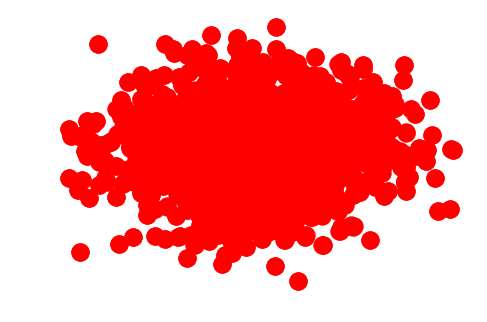

In [72]:
import matplotlib.pyplot as plt

G_Align=nx.Graph()
elist = unique_xmap
G_Align.add_weighted_edges_from(elist)
nx.draw(G_Align)
plt.show()

## compare node and edge connectivity
## compute largest connected component

In [61]:
print('Aligned graph have ',G_Align.number_of_nodes(),' nodes.')
print('Aligned graph have ',G_Align.number_of_edges(),' edges.')

Aligned graph have  6940  nodes.
Aligned graph have  15590  edges.


In [62]:
print('Target graph have ',G_target_na.number_of_nodes(),' nodes.')
print('Target graph have ',G_target_na.number_of_edges(), ' edges.')

Target graph have  7683  nodes.
Target graph have  45168  edges.


In [63]:
sum_weight=0
for i in range(len(unique_xmap)):
    sum_weight=sum_weight+ unique_xmap[i][2]
total_weight=0    
for i in range(len(nd1)):
    for j in range(len(nd2)):
        temp=G_target_na.get_edge_data(str(nd1[i]),str(nd2[j]))
        if(temp!=None):
            total_weight=total_weight+int(list(temp.values())[0])
print('Maximum Weight in Aligned graph: ',sum_weight) 
print('Total Weight in Target: ',total_weight)

Maximum Weight in Aligned graph:  2243752
Total Weight in Target:  4602983


In [64]:
# returns number of different connected components 
print('number of different connected components in Aligned graph: ',nx.number_connected_components(G_Align)) 
print('number of different connected components in Target graph: ',nx.number_connected_components(G_target_na))  

number of different connected components in Aligned graph:  821
number of different connected components in Target graph:  780


In [65]:
# returns list of nodes in different connected components 
cc_align=list(nx.connected_components(G_Align))
cc_target=list(nx.connected_components(G_target_na))
print(list(nx.connected_components(G_Align))) 
print(list(nx.connected_components(G_target_na)))

[{'ce1691', 'hs537', 'hs2561', 'ce9197', 'hs5660', 'hs9214', 'hs15008', 'hs6019', 'hs206', 'ce1792', 'hs3701', 'hs11867', 'hs8062', 'hs5423', 'hs6193', 'ce2312', 'hs17662', 'hs3501', 'hs8300', 'hs2684', 'hs14243', 'hs7740', 'hs4184', 'hs2532', 'hs10248', 'ce16468', 'hs11810', 'hs6677', 'ce3753', 'hs11711', 'hs17888', 'hs8402', 'hs3045', 'hs5807', 'ce11999', 'hs3942', 'hs10535', 'hs9743', 'hs692', 'ce3204', 'hs1028', 'hs11025', 'hs1755', 'ce6268', 'hs1277', 'hs671', 'hs1046', 'ce4190', 'hs12391', 'hs6317', 'hs5319', 'ce122', 'hs9757', 'hs3773', 'hs4215', 'hs9691', 'ce10400', 'ce1871', 'hs4155', 'hs311', 'hs2962', 'hs3879', 'hs3762', 'hs4780', 'hs4236', 'hs1499', 'hs12704', 'hs10', 'ce1384', 'ce8840', 'ce6376', 'ce855', 'hs7518', 'hs202', 'hs1431', 'hs826', 'ce6167', 'hs10901', 'hs12780', 'hs1359', 'ce11927', 'hs4980', 'hs6928', 'hs8769', 'hs4053', 'hs10979', 'hs3825', 'hs1256', 'hs11552', 'hs2187', 'hs5776', 'hs12837', 'ce3557', 'hs1357', 'ce3902', 'hs3548', 'hs3175', 'hs912', 'ce3279',

In [66]:
# returns number of nodes to be removed 
# so that Graph becomes disconnected 
print(nx.node_connectivity(G_Align)) 
print(nx.node_connectivity(G_target_na))
# returns number of edges to be removed 
# so that Graph becomes disconnected 
print(nx.edge_connectivity(G_Align))
print(nx.edge_connectivity(G_target_na))

0
0
0
0


## check similarity of connected components

In [67]:
count=0
for i in range(len(cc_align)):
    for j in range(len(cc_target)):
        if(cc_align[i]==cc_target[j]):
            count=count+1
print(count)

773


In [68]:
Gc = max(nx.connected_component_subgraphs(G_Align), key=len)
print('Largest common connected graph in Aligned graph: ',len(Gc))
Gct = max(nx.connected_component_subgraphs(G_target_na), key=len)
print('Largest common connected graph in Target graph: ',len(Gct))

Largest common connected graph in Aligned graph:  3432
Largest common connected graph in Target graph:  4509


### check for mistake align

In [55]:
for i in range(len(unique_xmap)):
    if (G_target_na.has_edge(unique_xmap[i][0], unique_xmap[i][1])==False):
        print(unique_xmap[i])
        print(i)
print('no exist error')    

no exist error


# draw graphs

In [0]:
nx.draw_networkx(G1, with_labels = True)

In [0]:
nx.draw_networkx(G2)

In [0]:
import matplotlib.pyplot as plt
nx.draw(G_target_na)
plt.show()

In [69]:
# total ec
total_ec=G_target_na.number_of_edges()/G1.number_of_edges()*100
ratio_ec=score_ec_temp/total_ec*100
print("total EC: ",total_ec)
print("ratio EC: ",ratio_ec)

total EC:  448.18416352450885
ratio EC:  34.51558625575629


In [70]:
# total ics
total_ics=G_target_na.number_of_edges()/count_induced*100
ratio_ics=score_ics_temp/total_ics*100
print("total ICS: ",total_ics)
print("ratio ICS: ",ratio_ics)

total ICS:  51.26435737957961
ratio ICS:  34.51558625575629


In [71]:
# total s3
total_s3=(G_target_na.number_of_edges()/(G1.number_of_edges()+count_induced-G_target_na.number_of_edges()))*100
ratio_s3=score_s3_temp/total_s3*100
print("total S3: ",total_s3)
print("ratio S3: ",ratio_s3)

total S3:  85.19370779735185
ratio S3:  22.155399197390754


# compute FC

In [10]:
import pickle
with open('ce-hs-weightGraph.pickle', 'rb') as f:
    unique_xmap = pickle.load(f)

In [11]:
tree=[[unique_xmap[i][0],unique_xmap[i][1]] for i in range(len(unique_xmap))]
tree

[['ce4377', 'hs17427'],
 ['ce8', 'hs39'],
 ['ce2314', 'hs983'],
 ['ce6383', 'hs3533'],
 ['ce5073', 'hs9843'],
 ['ce4060', 'hs3221'],
 ['ce6918', 'hs9387'],
 ['ce878', 'hs3219'],
 ['ce6572', 'hs9439'],
 ['ce16661', 'hs13359'],
 ['ce3799', 'hs8388'],
 ['ce3262', 'hs3490'],
 ['ce13829', 'hs13039'],
 ['ce878', 'hs8117'],
 ['ce1177', 'hs8300'],
 ['ce9094', 'hs5182'],
 ['ce1951', 'hs1717'],
 ['ce16432', 'hs18347'],
 ['ce5585', 'hs8847'],
 ['ce9895', 'hs11693'],
 ['ce3693', 'hs459'],
 ['ce8696', 'hs9444'],
 ['ce17773', 'hs18574'],
 ['ce2587', 'hs5828'],
 ['ce14942', 'hs5196'],
 ['ce15283', 'hs14425'],
 ['ce13012', 'hs5379'],
 ['ce8997', 'hs11370'],
 ['ce5179', 'hs5091'],
 ['ce886', 'hs7421'],
 ['ce95', 'hs912'],
 ['ce4134', 'hs4881'],
 ['ce1883', 'hs3464'],
 ['ce13488', 'hs17168'],
 ['ce1343', 'hs4004'],
 ['ce3569', 'hs6082'],
 ['ce10840', 'hs473'],
 ['ce4256', 'hs5647'],
 ['ce12465', 'hs4679'],
 ['ce5393', 'hs6895'],
 ['ce9764', 'hs10291'],
 ['ce7322', 'hs8027'],
 ['ce3317', 'hs8854'],
 ['ce

# load Ontology and create DAG graph

In [12]:
import pandas as pd
f=open('go.dag.obo.txt').readlines()
df=pd.DataFrame(f)
df

0
0                                GO:0046431 GO:0019599\n
1                                GO:0046430 GO:0019595\n
2                                GO:0046432 GO:0019361\n
3                                GO:0034198 GO:0060733\n
4                                GO:0046343 GO:0019872\n
5                                GO:0034193 GO:0034195\n
6                                GO:0034192 GO:0034194\n
7                                GO:0034190 GO:0034191\n
8                     GO:0046437 GO:0030632 GO:0070179\n
9                                GO:0046340 GO:0046342\n
10     GO:0030852 GO:0045658 GO:0030853 GO:0045643 GO...
11         GO:0030853 GO:0045659 GO:0045644 GO:0045641\n
12         GO:0030851 GO:0030221 GO:0030223 GO:0030222\n
13     GO:0030856 GO:0003339 GO:0030860 GO:0045601 GO...
14     GO:0030857 GO:0045602 GO:0030861 GO:0045617 GO...
15         GO:0030854 GO:0045645 GO:0045642 GO:0045660\n
16     GO:0030855 GO:0030859 GO:0030216 GO:0072192 GO...
17         GO:0030858 GO:0045603 GO:0030862 GO:0045618\n
18                               GO:0030859 GO:0045198\n
19                               GO:0031106 GO:0032186\n
20                    GO:0031105 GO:0032151 GO:0032152\n
21         GO:0031103 GO:0014814 GO:0048673 GO:0014012\n
22                    GO:0031102 GO:0031104 GO:0031103\n
23                    GO:0031109 GO:0046785 GO:0007019\n
24                    GO:0050832 GO:0009817 GO:0019732\n
25                               GO:0050833 GO:0005477\n
26                               GO:0050831 GO:0006962\n
27                               GO:0034776 GO:0071420\n
28                    GO:0045354 GO:0045355 GO:0045356\n
29                    GO:0030557 GO:0030560 GO:0030564\n
...                                                  ...
11284                 GO:0015732 GO:0032310 GO:0071720\n
11285  GO:0048338 GO:0048381 GO:0048402 GO:0048352 GO...
11286                            GO:0015730 GO:0015731\n
11287                 GO:0015736 GO:0015738 GO:0015737\n
11288                            GO:0015735 GO:0015736\n
11289                            GO:0052068 GO:0052069\n
11290                            GO:0070629 GO:0070630\n
11291                 GO:0052065 GO:0052265 GO:0052389\n
11292  GO:0070252 GO:0006932 GO:0033275 GO:0060327 GO...
11293                            GO:0043454 GO:0019487\n
11294  GO:0043455 GO:0043456 GO:0010371 GO:0009962 GO...
11295      GO:0042548 GO:0043155 GO:0042549 GO:0042550\n
11296      GO:0043450 GO:0009811 GO:0019370 GO:0009693\n
11297  GO:0043451 GO:0042184 GO:0042216 GO:0019337 GO...
11298      GO:0043452 GO:0043454 GO:0018864 GO:0043453\n
11299                            GO:0016427 GO:0016428\n
11300                 GO:0016426 GO:0016430 GO:0016429\n
11301                            GO:0001565 GO:0001566\n
11302  GO:0016423 GO:0004809 GO:0008176 GO:0009020 GO...
11303  GO:0016421 GO:0004658 GO:0004485 GO:0047925 GO...
11304      GO:0016420 GO:0050736 GO:0050735 GO:0016419\n
11305      GO:0045676 GO:0045501 GO:0045678 GO:0045677\n
11306                 GO:0070259 GO:0070260 GO:0017005\n
11307                            GO:0019191 GO:0022874\n
11308                            GO:0019196 GO:0022876\n
11309                            GO:0019194 GO:0022871\n
11310                            GO:0019198 GO:0005001\n
11311      GO:0019199 GO:0004675 GO:0004714 GO:0009784\n
11312                 GO:0070255 GO:0070256 GO:0070257\n
11313                 GO:0045679 GO:0045681 GO:0045680\n

[11314 rows x 1 columns]

In [13]:
# preprocessing
dag_list=[]
for i in range(len(df[0])):
    m1=str(df[0][i])
    m1=m1.replace('GO:','')
    m1=m1.replace('\n','')
    s=m1.split(' ')
    dag_list.append(s)
dag_list

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658', '0030853', '0045643', '0030854', '0045640'],
 ['0030853', '0045659', '0045644', '0045641'],
 ['0030851', '0030221', '0030223', '0030222'],
 ['0030856',
  '0003339',
  '0030860',
  '0045601',
  '0030857',
  '0072182',
  '0030858',
  '0045616'],
 ['0030857', '0045602', '0030861', '0045617', '0072183'],
 ['0030854', '0045645', '0045642', '0045660'],
 ['0030855',
  '0030859',
  '0030216',
  '0072192',
  '0060671',
  '0072160',
  '0060742',
  '0035026',
  '0072311',
  '0060487',
  '0045446',
  '0060644',
  '0002065'],
 ['0030858', '0045603', '0030862', '0045618'],
 ['0030859', '0045198'],
 ['0031106', '0032186'],
 ['0031105', '0032151', '0032152'],
 ['0031103', '0014814', '0048673', '0014012'],
 ['0031102', '00

In [14]:
dag_nd=[]
for i in range(len(dag_list)):
    for j in range(len(dag_list[i])):
        dag_nd.append(dag_list[i][j])
dag_nodes=set(dag_nd)
print(dag_nodes)
print(len(dag_nodes))

{'0016268', '0010676', '0072176', '0046348', '0090303', '0014880', '0016126', '0047776', '0061125', '0008516', '0016437', '0005069', '0019370', '0071420', '0035047', '0075226', '0048466', '0003260', '0032243', '0033696', '0052079', '0043014', '0070053', '0042660', '0080076', '0000924', '0052111', '0001974', '0000748', '0018619', '0047554', '0052089', '0010442', '0055057', '0015352', '0047514', '0030386', '0019059', '0002519', '0018209', '0051357', '0060305', '0032723', '0048916', '0031049', '0051132', '0033008', '0016111', '0008061', '0002597', '0003242', '0070984', '0015902', '0021630', '0033192', '0032994', '0080106', '0018156', '0061167', '0043804', '0047109', '0030627', '0043890', '0046862', '0006523', '0043217', '0070052', '0004096', '0019445', '0034009', '0075271', '0047810', '0020006', '0046065', '0047489', '0019875', '2000003', '0031310', '0046857', '0019427', '0002202', '0075196', '0021780', '0071225', '0051731', '0070773', '0004367', '0051915', '0071587', '0070939', '0060251'

In [15]:
# create dag edges
dag_edges=[]
for i in range(len(dag_list)):
    for j in range(1,len(dag_list[i])):
        ed=[dag_list[i][0],dag_list[i][j]]
        dag_edges.append(ed)
dag_edges

[['0046431', '0019599'],
 ['0046430', '0019595'],
 ['0046432', '0019361'],
 ['0034198', '0060733'],
 ['0046343', '0019872'],
 ['0034193', '0034195'],
 ['0034192', '0034194'],
 ['0034190', '0034191'],
 ['0046437', '0030632'],
 ['0046437', '0070179'],
 ['0046340', '0046342'],
 ['0030852', '0045658'],
 ['0030852', '0030853'],
 ['0030852', '0045643'],
 ['0030852', '0030854'],
 ['0030852', '0045640'],
 ['0030853', '0045659'],
 ['0030853', '0045644'],
 ['0030853', '0045641'],
 ['0030851', '0030221'],
 ['0030851', '0030223'],
 ['0030851', '0030222'],
 ['0030856', '0003339'],
 ['0030856', '0030860'],
 ['0030856', '0045601'],
 ['0030856', '0030857'],
 ['0030856', '0072182'],
 ['0030856', '0030858'],
 ['0030856', '0045616'],
 ['0030857', '0045602'],
 ['0030857', '0030861'],
 ['0030857', '0045617'],
 ['0030857', '0072183'],
 ['0030854', '0045645'],
 ['0030854', '0045642'],
 ['0030854', '0045660'],
 ['0030855', '0030859'],
 ['0030855', '0030216'],
 ['0030855', '0072192'],
 ['0030855', '0060671'],


In [16]:
import networkx as nx
go=nx.DiGraph()
go.add_nodes_from(dag_nodes)
go.add_edges_from(dag_edges)
go

In [17]:
c=0
import numpy as np
na=tree
for i in range(len(tree)):
    for j in range(2):
        if ('hs' in tree[i][j] or 'ce' in tree[i][j]):
            s=tree[i][j][2:]
            x='0'*(7-len(s))
            y=x+s
            #print(y)
            na[i][j]=y
            c=c+1
print(len(tree),c)
print(len(na))

15653 31306
15653


In [18]:
fc=[]
for i in range(len(na)):
    if na[i][0] in dag_nodes:
        e=go.predecessors(na[i][0])
        if na[i][1] in dag_nodes: 
            f=go.predecessors(na[i][1])
            temp=[]
            for key in e:
                temp.append(key)
            for key in f:
                temp.append(key)
            # compute intersection/union 
            fc.append(sum([temp.count(temp[z])/len(temp) for z in range(len(temp))]))
        else:
            fc.append(0)
#print(fc)
# compute average of all fc 
func=np.average(fc)
print('functional coherence:',func)

functional coherence: 0.6199942066768049
